A) 

We will deploy the general form of the backpropagation equations for the Multilayered Perceptron given the following specific activation functions : i) ReLU, ii) hyperbolic tangent and iii) sigmoid. All activation functions for all layer of each neuron will be of the same kind for each experiment (ReLU, hyperbolic tangent or sigmoid). The general form of the backpropagation equations is given in the picture below and it's the same for all three activation functions. 


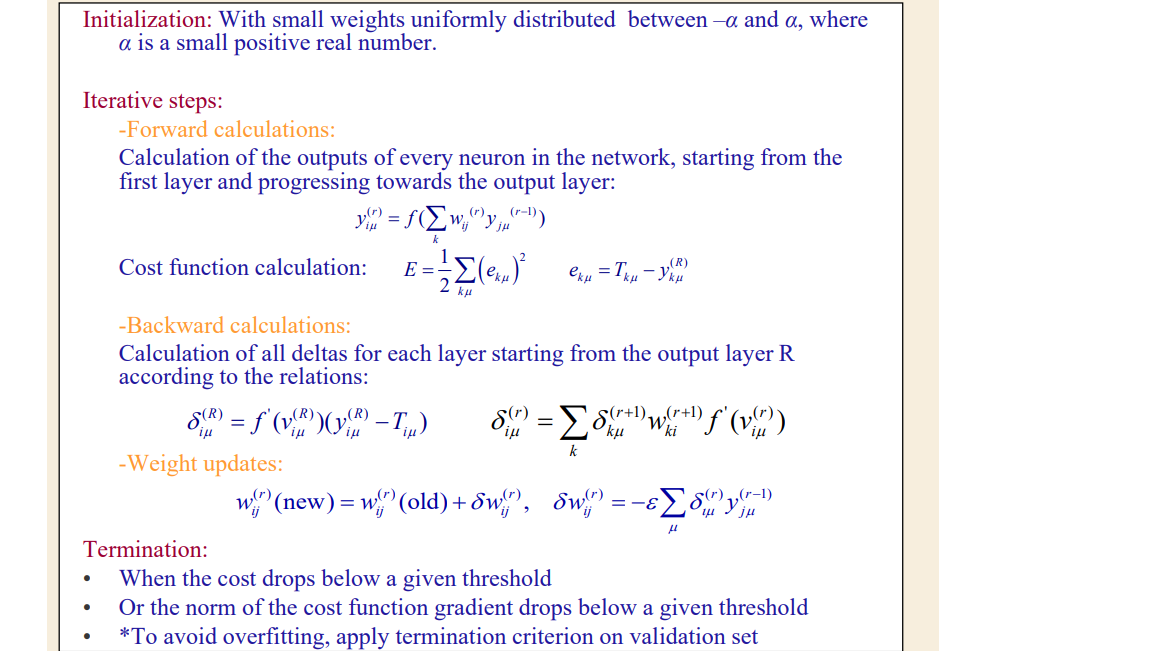

In [1]:
from PIL import Image
  
filename = "image.png"
Image.open(filename) 

R is the output layer and r are the intermediate (hidden) layers. For example, if there is a 3 - layered perceptron , with four original dimensions (inputs)  that lead to a first layer of 2 neurons, in order to calculate δw41 (1) (weight that connects the fourth input to the first neuron of the first layer), we will have to back - propagate two more times for caclulating the impact of hidden layer 2 and the output layer as well. In these additional steps, lies the main difference created by the implementation of the activation - function on each neuron. Each time performing back  -propagation, when going from layer to layer (starting from the output towards the hidden layers), together with other calculations, the first derivative of each activation function of the output of the neuron with respect to the input of the neuron should be calculated. For example, for the 3- layered perceptron example presented above,in order to calculate δw41 (1) which is a weight that stands last in that chain of calculations, at least three first derivatives of activation functions will have to be calculated. The final result will be, among other calculations, a product of these first derivatives. Depending on the architectire of this network (how many neurons each of these layers will have, these derivatives may be more than three in that example


Let's see how this will affect  the range of the gradients for each activation function. 

i) Firstly for ReLU function. 

ReLU function takes as input a number x and gives as output max(0,x). So the first derivative of the function (with respect to x) is either 0, if x<=0, or 1 if x>0.  As a consequence, it is obvious that an important benefit of the rectifier function is that it is capable of outputting a true zero value. This is unlike the tanh and sigmoid activation functions that learn to approximate a zero output, e.g. a value very close to zero, but not a true zero value. This means that negative inputs can output true zero values allowing the activation of hidden layers in neural networks to contain one or more true zero values. This is called a sparse representation and is a desirable property in representational learning as it can accelerate learning and simplify the model.

As can be observed, the ReLU activation simply returns its argument x whenever it is greater than zero, and returns 0 otherwise. The first derivative of ReLU is also very simple – it is equal to 1 when x is greater than zero, but otherwise it is 0. You can probably see the advantages of ReLU at this point – when it’s derivative is back-propagated there will be no degradation of the error signal as 1 x 1 x 1 x 1… = 1. However, the ReLU activation still maintains a non-linearity or “switch on” characteristic which enables it to behave analogously to a biological neuron.

There is only one problem with the ReLU activation. When performing back propagation, going from the end (output layer) to the start (and calculating through a path of the weights between the hidden layers), it is possible that the output of a neuron of a hidden layer turns negative.  In that case, when calculating διμ (r), this will turn to zero, leading the whole product of derivatives turning to zero and , as a result the whole δw for this particular weight. Note that this will also affect the chain of δw that will have to be calculated after that, because this equal - to -zero first derivative will be in the product calculated for these δws as well. Because the derivative is zero when x < 0, certain weights can be “killed off” or become “dead”. This is because the back-propagated error can be cancelled out whenever there is a negative input into a given neuron and therefore the gradient of that term will also fall to zero. This means there is no way for the associated weights to update in the right direction. This can obviously impact learning. (this problem can be solved with a variant of ReLU which is called a Leaky ReLU activation)

However, since the remaining f' will be equal to 1, for the weights that will be trained we will have avoided the vanishing gradient problem, which is particularly problematic with sigmoid activation functions. Indeed, for all outputs>0, there will be no longer the problem that the f’ terms are all outputting values << 1. Having lots of numbers << 1 together, we end up with a vanishing product, which leads to a very small product value and hence practically no learning of the weight values ( the predictive power of the neural network then platueus)



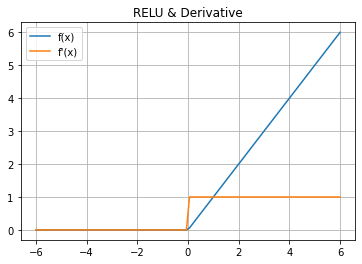

In [2]:
import numpy as np
from matplotlib import pyplot as plt

# Rectified Linear Unit
def relu(x):
  temp = [max(0,value) for value in x]
  return np.array(temp, dtype=float)
# Derivative for RELU
def drelu(x):
  temp = [1 if value>0 else 0 for value in x]
  return np.array(temp, dtype=float)

# Generating data to plot
x_data = np.linspace(-6,6,100)
y_data = relu(x_data)
dy_data = drelu(x_data)

# Plotting
plt.plot(x_data, y_data, x_data, dy_data)
plt.title('RELU & Derivative')
plt.legend(['f(x)','f\'(x)'])
plt.grid()
plt.show()

ii) Then for hyperbolic tangent function. 

The hyperbolic tangent function, or tanh for short, is a similar shaped nonlinear activation function that outputs values between -1.0 and 1.0. It is generally more preferred than the sigmoid activation function as models that used it were easier to train and often had better predictive performance. 

Deep models using the hyperbolic tangent activation function do not train easily, and much of this poor performance is blamed on the vanishing gradient problem.

The functiion's output is f(x) = (e^x – e^-x) / (e^x + e^-x) and its gradient is f' (x) =  1 – (f(x))^2    

This is better than the sigmoid, because it behaves a little better regarding the vanishing gradient problem, since its global maximum equals to 1, for x =0 . As a result, areas close (but really close) to zero, manage to have derivatives close to 1, so that when back propagating the learning value does not diminish as much as the sigmoid function. But still, the problem remainswhen recieving inputs away from zero (especially when |x| >2), as shown in the diagram below 


C:\Users\kosta\anaconda3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


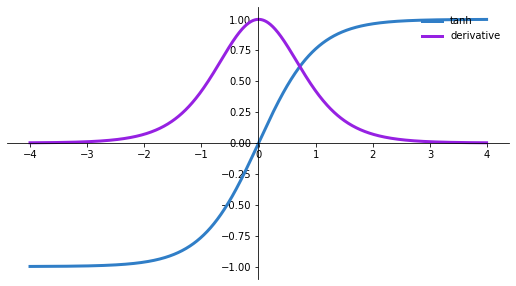

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def tanh(x):
    t=(np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))
    dt=1-t**2
    return t,dt
z=np.arange(-4,4,0.01)
tanh(z)[0].size,tanh(z)[1].size
# Setup centered axes
fig, ax = plt.subplots(figsize=(9, 5))
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
# Create and show plot
ax.plot(z,tanh(z)[0], color="#307EC7", linewidth=3, label="tanh")
ax.plot(z,tanh(z)[1], color="#9621E2", linewidth=3, label="derivative")
ax.legend(loc="upper right", frameon=False)
fig.show()

iii) FInally for the sigmoid (logistic)  function.

Its is calculated as f(x)=  1.0 / (1.0 + e^-x). Its derivative is f'(x)=(1-f(x))*(f(x)).

This function suffers the most from the  vanishing gradient problem. This is due to the fact that its derivative's global maximum is 0.25, so succesive multiplications of the derivatives will cause a dramatic decrease of the δw (this problem can only be confronted in the output layer implementing cross - entropy function). 

The limitations of the gradient can be seen below in the plot



C:\Users\kosta\anaconda3\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


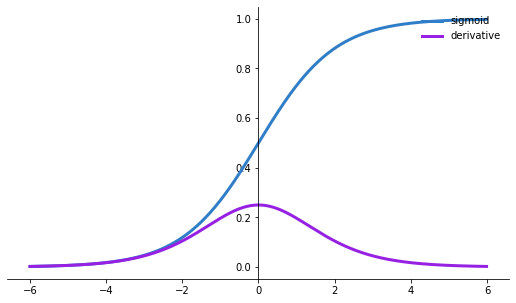

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(x):
    s=1/(1+np.exp(-x))
    ds=s*(1-s)  
    return s,ds
x=np.arange(-6,6,0.01)
sigmoid(x)
# Setup centered axes
fig, ax = plt.subplots(figsize=(9, 5))
ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
# Create and show plot
ax.plot(x,sigmoid(x)[0], color="#307EC7", linewidth=3, label="sigmoid")
ax.plot(x,sigmoid(x)[1], color="#9621E2", linewidth=3, label="derivative")
ax.legend(loc="upper right", frameon=False)
fig.show()

B)

Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


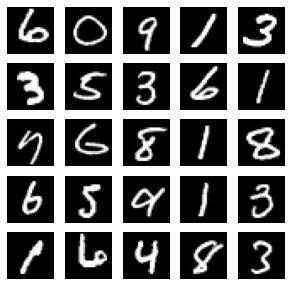

In [5]:
import tensorflow
from tensorflow import keras
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical, plot_model

# load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# count the number of unique train labels
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))

# count the number of unique test labels
unique, counts = np.unique(y_test, return_counts=True)
print("Test labels: ", dict(zip(unique, counts)))

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# sample 25 mnist digits from train dataset
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]

# plot the 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')

plt.show()
plt.close('all')

In [6]:
#a function for the prediction

def predict(x, predictor):
    # Get the data from the test set
    # Get output of network and prediction
    activations = predictor.predict(x.reshape(1, 28, 28, 1))
    prediction = np.argmax(activations)
    # Print the prediction of the network
    print('Network output: ')
    print(activations)
    print('Network prediction: ')
    print(prediction)
    plt.bar(range(10), activations[0])
    plt.show()
    print('Actual image: ')
    # Draw the image
    plt.imshow(x.reshape((28,28)), cmap='Greys')
    plt.show()

Let's start building the models as indicated from the exercise.

Model_ReLU_5 consists of 5 layers and relu activation functions in the hidden layers

Model_ReLU_20 consists of 20 layers and relu activation functions in the hidden layers

Model_ReLU_40 consists of 40 layers and relu activation functions in the hidden layers


Model_sigm_5 consists of 5 layers and sigmoid activation functions in the hidden layers

Model_sigm_20 consists of 20 layers and sigmoid activation functions in the hidden layers

Model_sigm_40 consists of 40 layers and sigmoid activation functions in the hidden layers


Model_hyper_5 consists of 5 layers and hyperbolic tangent  activation functions in the hidden layers

Model_hyper_20 consists of 20 layers and hyperbolic tangent   activation functions in the hidden layers

Model_hyper_40 consists of 40 layers and hyperbolic tangent   activation functions in the hidden layers

In [7]:
#Model_ReLU_5

import keras.layers as l
import keras.models as m
import keras.optimizers as o
import tensorflow as tf 


Model_ReLU_5 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28,1)),
  tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
Model_ReLU_5.compile(
    loss='categorical_crossentropy',
    optimizer= tf.keras.optimizers.SGD(learning_rate=0.01),
    metrics=["accuracy"]
)

Model_ReLU_5.summary()

Model_ReLU_5.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=50,
    validation_data=(x_test, y_test)
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 32)                1056      
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dense_5 (Dense)             (None, 10)                3

Epoch 49/50
938/938 [==============================] - 5s 5ms/step - loss: 0.0456 - accuracy: 0.9861 - val_loss: 0.1245 - val_accuracy: 0.9665
Epoch 50/50
938/938 [==============================] - 5s 5ms/step - loss: 0.0441 - accuracy: 0.9869 - val_loss: 0.1269 - val_accuracy: 0.9663


In [8]:
#Model_ReLU_20

import keras.layers as l
import keras.models as m
import keras.optimizers as o
import tensorflow as tf 


Model_ReLU_20 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28,1)),
  tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
Model_ReLU_20.compile(
    loss='categorical_crossentropy',
    optimizer= tf.keras.optimizers.SGD(learning_rate=0.01),
    metrics=["accuracy"]
)

Model_ReLU_20.summary()

Model_ReLU_20.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=50,
    validation_data=(x_test, y_test)
)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 32)                25120     
                                                                 
 dense_7 (Dense)             (None, 32)                1056      
                                                                 
 dense_8 (Dense)             (None, 32)                1056      
                                                                 
 dense_9 (Dense)             (None, 32)                1056      
                                                                 
 dense_10 (Dense)            (None, 32)                1056      
                                                                 
 dense_11 (Dense)            (None, 32)               

In [9]:
#Model_ReLU_40

import keras.layers as l
import keras.models as m
import keras.optimizers as o
import tensorflow as tf 


Model_ReLU_40 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28,1)),
  tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
Model_ReLU_40.compile(
    loss='categorical_crossentropy',
    optimizer= tf.keras.optimizers.SGD(learning_rate=0.01),
    metrics=["accuracy"]
)

Model_ReLU_40.summary()

Model_ReLU_40.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=50,
    validation_data=(x_test, y_test)
)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_27 (Dense)            (None, 32)                25120     
                                                                 
 dense_28 (Dense)            (None, 32)                1056      
                                                                 
 dense_29 (Dense)            (None, 32)                1056      
                                                                 
 dense_30 (Dense)            (None, 32)                1056      
                                                                 
 dense_31 (Dense)            (None, 32)                1056      
                                                                 
 dense_32 (Dense)            (None, 32)               

In [10]:
Relu_5_loss, Relu_5_accuracy =  Model_ReLU_5.evaluate( x_test,y_test)
Relu_20_loss, Relu_20_accuracy = Model_ReLU_20.evaluate( x_test,y_test)
Relu_40_loss, Relu_40_accuracy = Model_ReLU_40.evaluate( x_test,y_test)
print('\n')
print ('The accuracy for model with solely ReLU activation functions in the hidden layers and 5 hidden layers is: {:.2f}  %\n  '.format(100*Relu_5_accuracy))
print ('The accuracy for model with solely ReLU activation functions in the hidden layers and 20 hidden layers is: {:.2f}  %\n  '.format(100*Relu_20_accuracy))
print ('The accuracy for model with solely ReLU activation functions in the hidden layers and 40 hidden layers is: {:.2f}  %\n  '.format(100*Relu_40_accuracy))

313/313 [==============================] - 2s 6ms/step - loss: 0.6891 - accuracy: 0.7996


The accuracy for model with solely ReLU activation functions in the hidden layers and 5 hidden layers is: 96.63  %
  
The accuracy for model with solely ReLU activation functions in the hidden layers and 20 hidden layers is: 95.93  %
  
The accuracy for model with solely ReLU activation functions in the hidden layers and 40 hidden layers is: 79.96  %
  


In [11]:
#Model_sigm_5

import keras.layers as l
import keras.models as m
import keras.optimizers as o
import tensorflow as tf 


Model_sigm_5 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28,1)),
  tf.keras.layers.Dense(32, activation='sigmoid'),
      tf.keras.layers.Dense(32, activation='sigmoid'),
      tf.keras.layers.Dense(32, activation='sigmoid'),
      tf.keras.layers.Dense(32, activation='sigmoid'),
      tf.keras.layers.Dense(32, activation='sigmoid'),
  tf.keras.layers.Dense(10, activation='softmax')
])
Model_sigm_5.compile(
    loss='categorical_crossentropy',
    optimizer= tf.keras.optimizers.SGD(learning_rate=0.01),
    metrics=["accuracy"]
)

Model_sigm_5.summary()

Model_sigm_5.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=50,
    validation_data=(x_test, y_test)
)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_68 (Dense)            (None, 32)                25120     
                                                                 
 dense_69 (Dense)            (None, 32)                1056      
                                                                 
 dense_70 (Dense)            (None, 32)                1056      
                                                                 
 dense_71 (Dense)            (None, 32)                1056      
                                                                 
 dense_72 (Dense)            (None, 32)                1056      
                                                                 
 dense_73 (Dense)            (None, 10)               

Epoch 49/50
938/938 [==============================] - 5s 5ms/step - loss: 2.3008 - accuracy: 0.1125 - val_loss: 2.3003 - val_accuracy: 0.1135
Epoch 50/50
938/938 [==============================] - 5s 5ms/step - loss: 2.3007 - accuracy: 0.1137 - val_loss: 2.3003 - val_accuracy: 0.1135


In [12]:
#Model_sigm_20

import keras.layers as l
import keras.models as m
import keras.optimizers as o
import tensorflow as tf 


Model_sigm_20 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28,1)),
  tf.keras.layers.Dense(32, activation='sigmoid'),
      tf.keras.layers.Dense(32, activation='sigmoid'),
      tf.keras.layers.Dense(32, activation='sigmoid'),
      tf.keras.layers.Dense(32, activation='sigmoid'),
      tf.keras.layers.Dense(32, activation='sigmoid'),
     tf.keras.layers.Dense(32, activation='sigmoid'),
      tf.keras.layers.Dense(32, activation='sigmoid'),
      tf.keras.layers.Dense(32, activation='sigmoid'),
      tf.keras.layers.Dense(32, activation='sigmoid'),
      tf.keras.layers.Dense(32, activation='sigmoid'),
     tf.keras.layers.Dense(32, activation='sigmoid'),
      tf.keras.layers.Dense(32, activation='sigmoid'),
      tf.keras.layers.Dense(32, activation='sigmoid'),
      tf.keras.layers.Dense(32, activation='sigmoid'),
      tf.keras.layers.Dense(32, activation='sigmoid'),
     tf.keras.layers.Dense(32, activation='sigmoid'),
      tf.keras.layers.Dense(32, activation='sigmoid'),
      tf.keras.layers.Dense(32, activation='sigmoid'),
      tf.keras.layers.Dense(32, activation='sigmoid'),
      tf.keras.layers.Dense(32, activation='sigmoid'),
  tf.keras.layers.Dense(10, activation='softmax')
])
Model_sigm_20.compile(
    loss='categorical_crossentropy',
    optimizer= tf.keras.optimizers.SGD(learning_rate=0.01),
    metrics=["accuracy"]
)

Model_sigm_20.summary()

Model_sigm_20.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=50,
    validation_data=(x_test, y_test)
)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_74 (Dense)            (None, 32)                25120     
                                                                 
 dense_75 (Dense)            (None, 32)                1056      
                                                                 
 dense_76 (Dense)            (None, 32)                1056      
                                                                 
 dense_77 (Dense)            (None, 32)                1056      
                                                                 
 dense_78 (Dense)            (None, 32)                1056      
                                                                 
 dense_79 (Dense)            (None, 32)               

In [13]:
#Model_sigm_40

import keras.layers as l
import keras.models as m
import keras.optimizers as o
import tensorflow as tf 


Model_sigm_40 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28,1)),
  tf.keras.layers.Dense(32, activation='sigmoid'),
      tf.keras.layers.Dense(32, activation='sigmoid'),
      tf.keras.layers.Dense(32, activation='sigmoid'),
      tf.keras.layers.Dense(32, activation='sigmoid'),
      tf.keras.layers.Dense(32, activation='sigmoid'),
     tf.keras.layers.Dense(32, activation='sigmoid'),
      tf.keras.layers.Dense(32, activation='sigmoid'),
      tf.keras.layers.Dense(32, activation='sigmoid'),
      tf.keras.layers.Dense(32, activation='sigmoid'),
      tf.keras.layers.Dense(32, activation='sigmoid'),
     tf.keras.layers.Dense(32, activation='sigmoid'),
      tf.keras.layers.Dense(32, activation='sigmoid'),
      tf.keras.layers.Dense(32, activation='sigmoid'),
      tf.keras.layers.Dense(32, activation='sigmoid'),
      tf.keras.layers.Dense(32, activation='sigmoid'),
     tf.keras.layers.Dense(32, activation='sigmoid'),
      tf.keras.layers.Dense(32, activation='sigmoid'),
      tf.keras.layers.Dense(32, activation='sigmoid'),
      tf.keras.layers.Dense(32, activation='sigmoid'),
      tf.keras.layers.Dense(32, activation='sigmoid'),
    tf.keras.layers.Dense(32, activation='sigmoid'),
      tf.keras.layers.Dense(32, activation='sigmoid'),
      tf.keras.layers.Dense(32, activation='sigmoid'),
      tf.keras.layers.Dense(32, activation='sigmoid'),
      tf.keras.layers.Dense(32, activation='sigmoid'),
     tf.keras.layers.Dense(32, activation='sigmoid'),
      tf.keras.layers.Dense(32, activation='sigmoid'),
      tf.keras.layers.Dense(32, activation='sigmoid'),
      tf.keras.layers.Dense(32, activation='sigmoid'),
      tf.keras.layers.Dense(32, activation='sigmoid'),
     tf.keras.layers.Dense(32, activation='sigmoid'),
      tf.keras.layers.Dense(32, activation='sigmoid'),
      tf.keras.layers.Dense(32, activation='sigmoid'),
      tf.keras.layers.Dense(32, activation='sigmoid'),
      tf.keras.layers.Dense(32, activation='sigmoid'),
     tf.keras.layers.Dense(32, activation='sigmoid'),
      tf.keras.layers.Dense(32, activation='sigmoid'),
      tf.keras.layers.Dense(32, activation='sigmoid'),
      tf.keras.layers.Dense(32, activation='sigmoid'),
      tf.keras.layers.Dense(32, activation='sigmoid'),
  tf.keras.layers.Dense(10, activation='softmax')
])
Model_sigm_40.compile(
    loss='categorical_crossentropy',
    optimizer= tf.keras.optimizers.SGD(learning_rate=0.01),
    metrics=["accuracy"]
)

Model_sigm_40.summary()

Model_sigm_40.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=50,
    validation_data=(x_test, y_test)
)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_95 (Dense)            (None, 32)                25120     
                                                                 
 dense_96 (Dense)            (None, 32)                1056      
                                                                 
 dense_97 (Dense)            (None, 32)                1056      
                                                                 
 dense_98 (Dense)            (None, 32)                1056      
                                                                 
 dense_99 (Dense)            (None, 32)                1056      
                                                                 
 dense_100 (Dense)           (None, 32)               

In [14]:
sigm_5_loss, sigm_5_accuracy =  Model_sigm_5.evaluate( x_test,y_test)
sigm_20_loss, sigm_20_accuracy = Model_sigm_20.evaluate( x_test,y_test)
sigm_40_loss, sigm_40_accuracy = Model_sigm_40.evaluate( x_test,y_test)
print('\n')
print ('The accuracy for model with solely sigmoid activation functions in the hidden layers and 5 hidden layers is: {:.2f}  %\n  '.format(100*sigm_5_accuracy))
print ('The accuracy for model with solely sigmoid activation functions in the hidden layers and 20 hidden layers is: {:.2f}  %\n  '.format(100*sigm_20_accuracy))
print ('The accuracy for model with solely sigmoid activation functions in the hidden layers and 40 hidden layers is: {:.2f}  %\n  '.format(100*sigm_40_accuracy))

313/313 [==============================] - 2s 6ms/step - loss: 2.3012 - accuracy: 0.1135


The accuracy for model with solely sigmoid activation functions in the hidden layers and 5 hidden layers is: 11.35  %
  
The accuracy for model with solely sigmoid activation functions in the hidden layers and 20 hidden layers is: 11.35  %
  
The accuracy for model with solely sigmoid activation functions in the hidden layers and 40 hidden layers is: 11.35  %
  


In [15]:
#Model_hyper_5

import keras.layers as l
import keras.models as m
import keras.optimizers as o
import tensorflow as tf 


Model_hyper_5 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28,1)),
  tf.keras.layers.Dense(32, activation='tanh'),
      tf.keras.layers.Dense(32, activation='tanh'),
      tf.keras.layers.Dense(32, activation='tanh'),
      tf.keras.layers.Dense(32, activation='tanh'),
      tf.keras.layers.Dense(32, activation='tanh'),
  tf.keras.layers.Dense(10, activation='softmax')
])
Model_hyper_5.compile(
    loss='categorical_crossentropy',
    optimizer= tf.keras.optimizers.SGD(learning_rate=0.01),
    metrics=["accuracy"]
)

Model_hyper_5.summary()

#We will save the fit of the model in order to exploit the results in 1)d) exercise
history_model_hyper_5=Model_hyper_5.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=50,
    validation_data=(x_test, y_test)
)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_136 (Dense)           (None, 32)                25120     
                                                                 
 dense_137 (Dense)           (None, 32)                1056      
                                                                 
 dense_138 (Dense)           (None, 32)                1056      
                                                                 
 dense_139 (Dense)           (None, 32)                1056      
                                                                 
 dense_140 (Dense)           (None, 32)                1056      
                                                                 
 dense_141 (Dense)           (None, 10)               

Epoch 49/50
938/938 [==============================] - 5s 5ms/step - loss: 0.0502 - accuracy: 0.9863 - val_loss: 0.1131 - val_accuracy: 0.9664
Epoch 50/50
938/938 [==============================] - 5s 5ms/step - loss: 0.0489 - accuracy: 0.9864 - val_loss: 0.1146 - val_accuracy: 0.9674


In [16]:
#Model_hyper_20

import keras.layers as l
import keras.models as m
import keras.optimizers as o
import tensorflow as tf 


Model_hyper_20 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28,1)),
  tf.keras.layers.Dense(32, activation='tanh'),
      tf.keras.layers.Dense(32, activation='tanh'),
      tf.keras.layers.Dense(32, activation='tanh'),
      tf.keras.layers.Dense(32, activation='tanh'),
      tf.keras.layers.Dense(32, activation='tanh'),
      tf.keras.layers.Dense(32, activation='tanh'),
      tf.keras.layers.Dense(32, activation='tanh'),
      tf.keras.layers.Dense(32, activation='tanh'),
      tf.keras.layers.Dense(32, activation='tanh'),
      tf.keras.layers.Dense(32, activation='tanh'),
      tf.keras.layers.Dense(32, activation='tanh'),
      tf.keras.layers.Dense(32, activation='tanh'),
      tf.keras.layers.Dense(32, activation='tanh'),
      tf.keras.layers.Dense(32, activation='tanh'),
      tf.keras.layers.Dense(32, activation='tanh'),
      tf.keras.layers.Dense(32, activation='tanh'),
      tf.keras.layers.Dense(32, activation='tanh'),
      tf.keras.layers.Dense(32, activation='tanh'),
      tf.keras.layers.Dense(32, activation='tanh'),
      tf.keras.layers.Dense(32, activation='tanh'),
  tf.keras.layers.Dense(10, activation='softmax')
])
Model_hyper_20.compile(
    loss='categorical_crossentropy',
    optimizer= tf.keras.optimizers.SGD(learning_rate=0.01),
    metrics=["accuracy"]
)

Model_hyper_20.summary()

#We will save the fit of the model in order to exploit the results in 1)d) exercise
history_model_hyper_20=Model_hyper_20.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=50,
    validation_data=(x_test, y_test)
)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_142 (Dense)           (None, 32)                25120     
                                                                 
 dense_143 (Dense)           (None, 32)                1056      
                                                                 
 dense_144 (Dense)           (None, 32)                1056      
                                                                 
 dense_145 (Dense)           (None, 32)                1056      
                                                                 
 dense_146 (Dense)           (None, 32)                1056      
                                                                 
 dense_147 (Dense)           (None, 32)               

In [17]:
#Model_hyper_40

import keras.layers as l
import keras.models as m
import keras.optimizers as o
import tensorflow as tf 


Model_hyper_40 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28,1)),
  tf.keras.layers.Dense(32, activation='tanh'),
      tf.keras.layers.Dense(32, activation='tanh'),
      tf.keras.layers.Dense(32, activation='tanh'),
      tf.keras.layers.Dense(32, activation='tanh'),
      tf.keras.layers.Dense(32, activation='tanh'),
      tf.keras.layers.Dense(32, activation='tanh'),
      tf.keras.layers.Dense(32, activation='tanh'),
      tf.keras.layers.Dense(32, activation='tanh'),
      tf.keras.layers.Dense(32, activation='tanh'),
      tf.keras.layers.Dense(32, activation='tanh'),
      tf.keras.layers.Dense(32, activation='tanh'),
      tf.keras.layers.Dense(32, activation='tanh'),
      tf.keras.layers.Dense(32, activation='tanh'),
      tf.keras.layers.Dense(32, activation='tanh'),
      tf.keras.layers.Dense(32, activation='tanh'),
      tf.keras.layers.Dense(32, activation='tanh'),
      tf.keras.layers.Dense(32, activation='tanh'),
      tf.keras.layers.Dense(32, activation='tanh'),
      tf.keras.layers.Dense(32, activation='tanh'),
      tf.keras.layers.Dense(32, activation='tanh'),
     tf.keras.layers.Dense(32, activation='tanh'),
      tf.keras.layers.Dense(32, activation='tanh'),
      tf.keras.layers.Dense(32, activation='tanh'),
      tf.keras.layers.Dense(32, activation='tanh'),
      tf.keras.layers.Dense(32, activation='tanh'),
      tf.keras.layers.Dense(32, activation='tanh'),
      tf.keras.layers.Dense(32, activation='tanh'),
      tf.keras.layers.Dense(32, activation='tanh'),
      tf.keras.layers.Dense(32, activation='tanh'),
      tf.keras.layers.Dense(32, activation='tanh'),
      tf.keras.layers.Dense(32, activation='tanh'),
      tf.keras.layers.Dense(32, activation='tanh'),
      tf.keras.layers.Dense(32, activation='tanh'),
      tf.keras.layers.Dense(32, activation='tanh'),
      tf.keras.layers.Dense(32, activation='tanh'),
      tf.keras.layers.Dense(32, activation='tanh'),
      tf.keras.layers.Dense(32, activation='tanh'),
      tf.keras.layers.Dense(32, activation='tanh'),
      tf.keras.layers.Dense(32, activation='tanh'),
      tf.keras.layers.Dense(32, activation='tanh'),
  tf.keras.layers.Dense(10, activation='softmax')
])
Model_hyper_40.compile(
    loss='categorical_crossentropy',
    optimizer= tf.keras.optimizers.SGD(learning_rate=0.01),
    metrics=["accuracy"]
)

Model_hyper_40.summary()

#We will save the fit of the model in order to exploit the results in 1)d) exercise
history_model_hyper_40=Model_hyper_40.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=50,
    validation_data=(x_test, y_test)
)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_163 (Dense)           (None, 32)                25120     
                                                                 
 dense_164 (Dense)           (None, 32)                1056      
                                                                 
 dense_165 (Dense)           (None, 32)                1056      
                                                                 
 dense_166 (Dense)           (None, 32)                1056      
                                                                 
 dense_167 (Dense)           (None, 32)                1056      
                                                                 
 dense_168 (Dense)           (None, 32)               

In [18]:
hyper_5_loss, hyper_5_accuracy =  Model_hyper_5.evaluate( x_test,y_test)
hyper_20_loss, hyper_20_accuracy = Model_hyper_20.evaluate( x_test,y_test)
hyper_40_loss, hyper_40_accuracy = Model_hyper_40.evaluate( x_test,y_test)
print('\n')
print ('The accuracy for model with solely hyperbolic tangent activation functions  in the hidden layers and 5 hidden layers is: {:.2f}  %\n  '.format(100*hyper_5_accuracy))
print ('The accuracy for model with solely hyperbolic tangent activation functions in the hidden layers and 20 hidden layers is: {:.2f}  %\n  '.format(100*hyper_20_accuracy))
print ('The accuracy for model with solely hyperbolic tangent activation functions in the hidden layers and 40 hidden layers is: {:.2f}  %\n  '.format(100*hyper_40_accuracy))

313/313 [==============================] - 2s 6ms/step - loss: 0.1682 - accuracy: 0.9647


The accuracy for model with solely hyperbolic tangent activation functions  in the hidden layers and 5 hidden layers is: 96.74  %
  
The accuracy for model with solely hyperbolic tangent activation functions in the hidden layers and 20 hidden layers is: 96.11  %
  
The accuracy for model with solely hyperbolic tangent activation functions in the hidden layers and 40 hidden layers is: 96.47  %
  


An overall presentation of the results:

In [19]:
print('\n')
print ('The accuracy for model with solely ReLU activation functions in the hidden layers and 5 hidden layers is: {:.2f}  %\n  '.format(100*Relu_5_accuracy))
print ('The accuracy for model with solely ReLU activation functions in the hidden layers and 20 hidden layers is: {:.2f}  %\n  '.format(100*Relu_20_accuracy))
print ('The accuracy for model with solely ReLU activation functions in the hidden layers and 40 hidden layers is: {:.2f}  %\n  '.format(100*Relu_40_accuracy))
print('\n')
print ('The accuracy for model with solely sigmoid activation functions in the hidden layers and 5 hidden layers is: {:.2f}  %\n  '.format(100*sigm_5_accuracy))
print ('The accuracy for model with solely sigmoid activation functions in the hidden layers and 20 hidden layers is: {:.2f}  %\n  '.format(100*sigm_20_accuracy))
print ('The accuracy for model with solely sigmoid activation functions in the hidden layers and 40 hidden layers is: {:.2f}  %\n  '.format(100*sigm_40_accuracy))
print('\n')
print ('The accuracy for model with solely hyperbolic tangent activation functions  in the hidden layers and 5 hidden layers is: {:.2f}  %\n  '.format(100*hyper_5_accuracy))
print ('The accuracy for model with solely hyperbolic tangent activation functions in the hidden layers and 20 hidden layers is: {:.2f}  %\n  '.format(100*hyper_20_accuracy))
print ('The accuracy for model with solely hyperbolic tangent activation functions in the hidden layers and 40 hidden layers is: {:.2f}  %\n  '.format(100*hyper_40_accuracy))



The accuracy for model with solely ReLU activation functions in the hidden layers and 5 hidden layers is: 96.63  %
  
The accuracy for model with solely ReLU activation functions in the hidden layers and 20 hidden layers is: 95.93  %
  
The accuracy for model with solely ReLU activation functions in the hidden layers and 40 hidden layers is: 79.96  %
  


The accuracy for model with solely sigmoid activation functions in the hidden layers and 5 hidden layers is: 11.35  %
  
The accuracy for model with solely sigmoid activation functions in the hidden layers and 20 hidden layers is: 11.35  %
  
The accuracy for model with solely sigmoid activation functions in the hidden layers and 40 hidden layers is: 11.35  %
  


The accuracy for model with solely hyperbolic tangent activation functions  in the hidden layers and 5 hidden layers is: 96.74  %
  
The accuracy for model with solely hyperbolic tangent activation functions in the hidden layers and 20 hidden layers is: 96.11  %
  
The acc

The best Model was the 5 - layer model with solely hyppperbolic tangent functions as activation function in the neurons of the inner dense layers. Moreover , Hyperbolic Tangent activation functions presented overall the best performance, no matter how many hidden layers were exploited. Sigmoid functions were the worst overall, probably because of the phenomenon called the vanishing gradient problem. ReLU had a poor performance  when a model of 40 layers was constructed (compared to Relu models of 20 and 5 inner dense Layers). This was probably due to the fact that with so many layers, and since the derivative of ReLU is zero when x < 0, certain weights can be “killed off” or become “dead” during back propagation. This is because the back-propagated error can be cancelled out whenever there is a negative input into a given neuron and therefore the gradient of that term will also fall to zero. This means there is no way for the associated weights to update in the right direction. This can obviously impact learning. So with 40 layers overall, probably in the chain of calculations some inputs would be less than zero, leading the derivative of the function to be zero, and therefore kill the learning procedure and the update of certain weights of the model

C)

Firstly we will create some necessary functions

In [20]:
import keras.layers as l
import keras.models as m
import keras.optimizers as o
import tensorflow as tf 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

def Model_5_Layers (act_func):
    
# This function takes as iput the just the activation function for the intermediate 5 dense layers of a neural network. 
# It trains the network with mnist dataset (lr=0.01,batch size=64, final layer activ function=softmax,epochs=3,optimizer=SGD)
#and it saves all the gradients of all weigghts of all layers of all mini batches.
# Then it returns a list with the maximum grad of each layer of the network (both kernel's and bias')


    model = keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(32, activation=act_func),
    tf.keras.layers.Dense(32, activation=act_func),
    tf.keras.layers.Dense(32, activation=act_func),
    tf.keras.layers.Dense(32, activation=act_func),
    tf.keras.layers.Dense(32, activation=act_func),
  tf.keras.layers.Dense(10, activation='softmax')
])

    # Instantiate an optimizer.
    optimizer= tf.keras.optimizers.SGD(learning_rate=0.01)
    # Instantiate a loss function.
    loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=True)

    # Prepare the training dataset.
    batch_size = 64


    # Prepare the training dataset.
    train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
    train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size)

    # Prepare the validation dataset.
    val_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
    val_dataset = val_dataset.batch(batch_size)

    epochs = 3
    all_grads=[]
    for epoch in range(epochs):
        print("\nStart of epoch %d" % (epoch+1,))

        # Iterate over the batches of the dataset.
        for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):

            # Open a GradientTape to record the operations run
            # during the forward pass, which enables auto-differentiation.
            with tf.GradientTape(persistent=True) as tape:

            # Run the forward pass of the layer.
            # The operations that the layer applies
            # to its inputs are going to be recorded
            # on the GradientTape.
                logits =model(x_batch_train, training=True)  # Logits for this minibatch

            # Compute the loss value for this minibatch.
                loss_value = loss_fn(y_batch_train, logits)

        # Use the gradient tape to automatically retrieve
        # the gradients of the trainable variables with respect to the loss.
            grads = tape.gradient(loss_value, model.trainable_weights)

        # Run one step of gradient descent by updating
        # the value of the variables to minimize the loss.
            optimizer.apply_gradients(zip(grads, model.trainable_weights))
            all_grads.append(grads)
        # Log every 200 batches.
            if step % 200 == 0:
                print(
                "Training loss (for one batch) at step %d: %.4f"
                % (step, float(loss_value))
            )
                print("Seen so far: %s samples" % ((step + 1) * batch_size))

    max_grads=[]
    for j in range(len(grads)):
        max_grads.append(0)
    
    for i in range (len(all_grads)):
        for j in range (len(grads)):
            if tf.math.reduce_max(all_grads[i][j]).numpy()>max_grads[j]:
                max_grads[j]=tf.math.reduce_max(all_grads[i][j]).numpy()
                
    return max_grads


def Model_20_Layers (act_func):
    
# This function takes as iput the just the activation function for the intermediate 20 dense layers of a neural network. 
# It trains the network with mnist dataset (lr=0.01,batch size=64, final layer activ function=softmax,epochs=3,optimizer=SGD)
#and it saves all the gradients of all weigghts of all layers of all mini batches.
# Then it returns a list with the maximum grad of each layer of the network (both kernel's and bias')


    model = keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(32, activation=act_func),
    tf.keras.layers.Dense(32, activation=act_func),
    tf.keras.layers.Dense(32, activation=act_func),
    tf.keras.layers.Dense(32, activation=act_func),
    tf.keras.layers.Dense(32, activation=act_func),
        tf.keras.layers.Dense(32, activation=act_func),
    tf.keras.layers.Dense(32, activation=act_func),
    tf.keras.layers.Dense(32, activation=act_func),
    tf.keras.layers.Dense(32, activation=act_func),
    tf.keras.layers.Dense(32, activation=act_func),
        tf.keras.layers.Dense(32, activation=act_func),
    tf.keras.layers.Dense(32, activation=act_func),
    tf.keras.layers.Dense(32, activation=act_func),
    tf.keras.layers.Dense(32, activation=act_func),
    tf.keras.layers.Dense(32, activation=act_func),
        tf.keras.layers.Dense(32, activation=act_func),
    tf.keras.layers.Dense(32, activation=act_func),
    tf.keras.layers.Dense(32, activation=act_func),
    tf.keras.layers.Dense(32, activation=act_func),
    tf.keras.layers.Dense(32, activation=act_func),
  tf.keras.layers.Dense(10, activation='softmax')
])

    # Instantiate an optimizer.
    optimizer= tf.keras.optimizers.SGD(learning_rate=0.01)
    # Instantiate a loss function.
    loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=True)

    # Prepare the training dataset.
    batch_size = 64


    # Prepare the training dataset.
    train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
    train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size)

    # Prepare the validation dataset.
    val_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
    val_dataset = val_dataset.batch(batch_size)

    epochs = 3
    all_grads=[]
    for epoch in range(epochs):
        print("\nStart of epoch %d" % (epoch+1,))

        # Iterate over the batches of the dataset.
        for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):

            # Open a GradientTape to record the operations run
            # during the forward pass, which enables auto-differentiation.
            with tf.GradientTape(persistent=True) as tape:

            # Run the forward pass of the layer.
            # The operations that the layer applies
            # to its inputs are going to be recorded
            # on the GradientTape.
                logits =model(x_batch_train, training=True)  # Logits for this minibatch

            # Compute the loss value for this minibatch.
                loss_value = loss_fn(y_batch_train, logits)

        # Use the gradient tape to automatically retrieve
        # the gradients of the trainable variables with respect to the loss.
            grads = tape.gradient(loss_value, model.trainable_weights)

        # Run one step of gradient descent by updating
        # the value of the variables to minimize the loss.
            optimizer.apply_gradients(zip(grads, model.trainable_weights))
            all_grads.append(grads)
        # Log every 200 batches.
            if step % 200 == 0:
                print(
                "Training loss (for one batch) at step %d: %.4f"
                % (step, float(loss_value))
            )
                print("Seen so far: %s samples" % ((step + 1) * batch_size))

    max_grads=[]
    for j in range(len(grads)):
        max_grads.append(0)
    
    for i in range (len(all_grads)):
        for j in range (len(grads)):
            if tf.math.reduce_max(all_grads[i][j]).numpy()>max_grads[j]:
                max_grads[j]=tf.math.reduce_max(all_grads[i][j]).numpy()
                
    return max_grads


def Model_40_Layers (act_func):
    
# This function takes as iput the just the activation function for the intermediate 40 dense layers of a neural network. 
# It trains the network with mnist dataset (lr=0.01,batch size=64, final layer activ function=softmax,epochs=3,optimizer=SGD)
#and it saves all the gradients of all weigghts of all layers of all mini batches.
# Then it returns a list with the maximum grad of each layer of the network (both kernel's and bias')


    model = keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(32, activation=act_func),
    tf.keras.layers.Dense(32, activation=act_func),
    tf.keras.layers.Dense(32, activation=act_func),
    tf.keras.layers.Dense(32, activation=act_func),
    tf.keras.layers.Dense(32, activation=act_func),
        tf.keras.layers.Dense(32, activation=act_func),
    tf.keras.layers.Dense(32, activation=act_func),
    tf.keras.layers.Dense(32, activation=act_func),
    tf.keras.layers.Dense(32, activation=act_func),
    tf.keras.layers.Dense(32, activation=act_func),
        tf.keras.layers.Dense(32, activation=act_func),
    tf.keras.layers.Dense(32, activation=act_func),
    tf.keras.layers.Dense(32, activation=act_func),
    tf.keras.layers.Dense(32, activation=act_func),
    tf.keras.layers.Dense(32, activation=act_func),
        tf.keras.layers.Dense(32, activation=act_func),
    tf.keras.layers.Dense(32, activation=act_func),
    tf.keras.layers.Dense(32, activation=act_func),
    tf.keras.layers.Dense(32, activation=act_func),
    tf.keras.layers.Dense(32, activation=act_func),
        
  tf.keras.layers.Dense(32, activation=act_func),
    tf.keras.layers.Dense(32, activation=act_func),
    tf.keras.layers.Dense(32, activation=act_func),
    tf.keras.layers.Dense(32, activation=act_func),
    tf.keras.layers.Dense(32, activation=act_func),
        tf.keras.layers.Dense(32, activation=act_func),
    tf.keras.layers.Dense(32, activation=act_func),
    tf.keras.layers.Dense(32, activation=act_func),
    tf.keras.layers.Dense(32, activation=act_func),
    tf.keras.layers.Dense(32, activation=act_func),
        tf.keras.layers.Dense(32, activation=act_func),
    tf.keras.layers.Dense(32, activation=act_func),
    tf.keras.layers.Dense(32, activation=act_func),
    tf.keras.layers.Dense(32, activation=act_func),
    tf.keras.layers.Dense(32, activation=act_func),
        tf.keras.layers.Dense(32, activation=act_func),
    tf.keras.layers.Dense(32, activation=act_func),
    tf.keras.layers.Dense(32, activation=act_func),
    tf.keras.layers.Dense(32, activation=act_func),
    tf.keras.layers.Dense(32, activation=act_func),
  tf.keras.layers.Dense(10, activation='softmax')
])

    # Instantiate an optimizer.
    optimizer= tf.keras.optimizers.SGD(learning_rate=0.01)
    # Instantiate a loss function.
    loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=True)

    # Prepare the training dataset.
    batch_size = 64


    # Prepare the training dataset.
    train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
    train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size)

    # Prepare the validation dataset.
    val_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
    val_dataset = val_dataset.batch(batch_size)

    epochs = 3
    all_grads=[]
    for epoch in range(epochs):
        print("\nStart of epoch %d" % (epoch+1,))

        # Iterate over the batches of the dataset.
        for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):

            # Open a GradientTape to record the operations run
            # during the forward pass, which enables auto-differentiation.
            with tf.GradientTape(persistent=True) as tape:

            # Run the forward pass of the layer.
            # The operations that the layer applies
            # to its inputs are going to be recorded
            # on the GradientTape.
                logits =model(x_batch_train, training=True)  # Logits for this minibatch

            # Compute the loss value for this minibatch.
                loss_value = loss_fn(y_batch_train, logits)

        # Use the gradient tape to automatically retrieve
        # the gradients of the trainable variables with respect to the loss.
            grads = tape.gradient(loss_value, model.trainable_weights)

        # Run one step of gradient descent by updating
        # the value of the variables to minimize the loss.
            optimizer.apply_gradients(zip(grads, model.trainable_weights))
            all_grads.append(grads)
        # Log every 200 batches.
            if step % 200 == 0:
                print(
                "Training loss (for one batch) at step %d: %.4f"
                % (step, float(loss_value))
            )
                print("Seen so far: %s samples" % ((step + 1) * batch_size))

    max_grads=[]
    for j in range(len(grads)):
        max_grads.append(0)
    
    for i in range (len(all_grads)):
        for j in range (len(grads)):
            if tf.math.reduce_max(all_grads[i][j]).numpy()>max_grads[j]:
                max_grads[j]=tf.math.reduce_max(all_grads[i][j]).numpy()
                
    return max_grads

def plot_the_max(relu,sigmoid,tanh):
    # This function plots in the same plot all the maximum gradients of each layer of networks of the same layer -length. It
    #takes as input three lists of the maximum of the gradients of all three networks (each network differs in the 
    #activation function of the inner dense layers) and plot them 
    data={'max_grad_relu':relu,'max_grad_sigmoid':sigmoid,'max_grad_tanh':tanh}
    titles=[]
    for j in range(1,len(relu)+1):
        if j<len(relu)-1:
            if j%2==1:
                layer_no=(j+1)/2
                titles.append('Layer '+str(layer_no)+' kernel')
            else:
                layer_no=(j)/2
                titles.append('Layer '+str(layer_no)+' bias')
        else:
            if j%2==1:
                titles.append('Final (output) layer kernel')
            else:
                titles.append('Final (output) layer bias')
                
    
    df=pd.DataFrame(data,index=titles)
    layer_len=len(relu)/2
    title='Max gradient of every layer on a '+ str(layer_len)+ '- Dense Layer Neural Network'
    if layer_len<20:
        mpl.rc('ytick', labelsize=20) 
        mpl.rc('xtick', labelsize=20) 
        plt.figure(figsize=(24,16))
        plt.plot(df)
        plt.xticks(rotation=45)
        plt.grid()
        plt.legend(df.columns[:],fontsize=18)
        plt.title(title, fontsize=30)
        plt.xlabel('Layers', fontsize=22)
        plt.show()
    else:
        x_axis=list(df.index)
        for count in range (1,len(x_axis)):
            if count%4!=0:
                x_axis[count]=count*' '
        df.index=x_axis
        mpl.rc('ytick', labelsize=20) 
        mpl.rc('xtick', labelsize=20) 
        plt.figure(figsize=(24,16))
        plt.plot(df)
        plt.xticks(rotation=45)
        plt.grid()
        plt.legend(df.columns,fontsize=18)
        plt.title(title, fontsize=30)
        plt.xlabel('Layers', fontsize=22)
        plt.show()
 


Now let's start with the implementation of the above functions. Fristly for the models with 5 intermediate dense layers

In [21]:
print('Start of the relu model\n')
relu_max=Model_5_Layers ('relu')
print('\n')
print('\n')
print('-------------------------------------------------------')
print('Start of the sigmoid model\n')
sigmoid_max=Model_5_Layers ('sigmoid')
print('\n')
print('\n')
print('-------------------------------------------------------')
print('Start of the tanh model\n')
tanh_max=Model_5_Layers ('tanh')



Start of the relu model


Start of epoch 1


C:\Users\kosta\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1096: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


Training loss (for one batch) at step 0: 2.3222
Seen so far: 64 samples
Training loss (for one batch) at step 200: 2.2314
Seen so far: 12864 samples
Training loss (for one batch) at step 400: 1.6752
Seen so far: 25664 samples
Training loss (for one batch) at step 600: 0.9257
Seen so far: 38464 samples
Training loss (for one batch) at step 800: 0.5932
Seen so far: 51264 samples

Start of epoch 2
Training loss (for one batch) at step 0: 0.5397
Seen so far: 64 samples
Training loss (for one batch) at step 200: 0.4503
Seen so far: 12864 samples
Training loss (for one batch) at step 400: 0.4125
Seen so far: 25664 samples
Training loss (for one batch) at step 600: 0.6700
Seen so far: 38464 samples
Training loss (for one batch) at step 800: 0.3065
Seen so far: 51264 samples

Start of epoch 3
Training loss (for one batch) at step 0: 0.5858
Seen so far: 64 samples
Training loss (for one batch) at step 200: 0.4559
Seen so far: 12864 samples
Training loss (for one batch) at step 400: 0.2977
Seen 

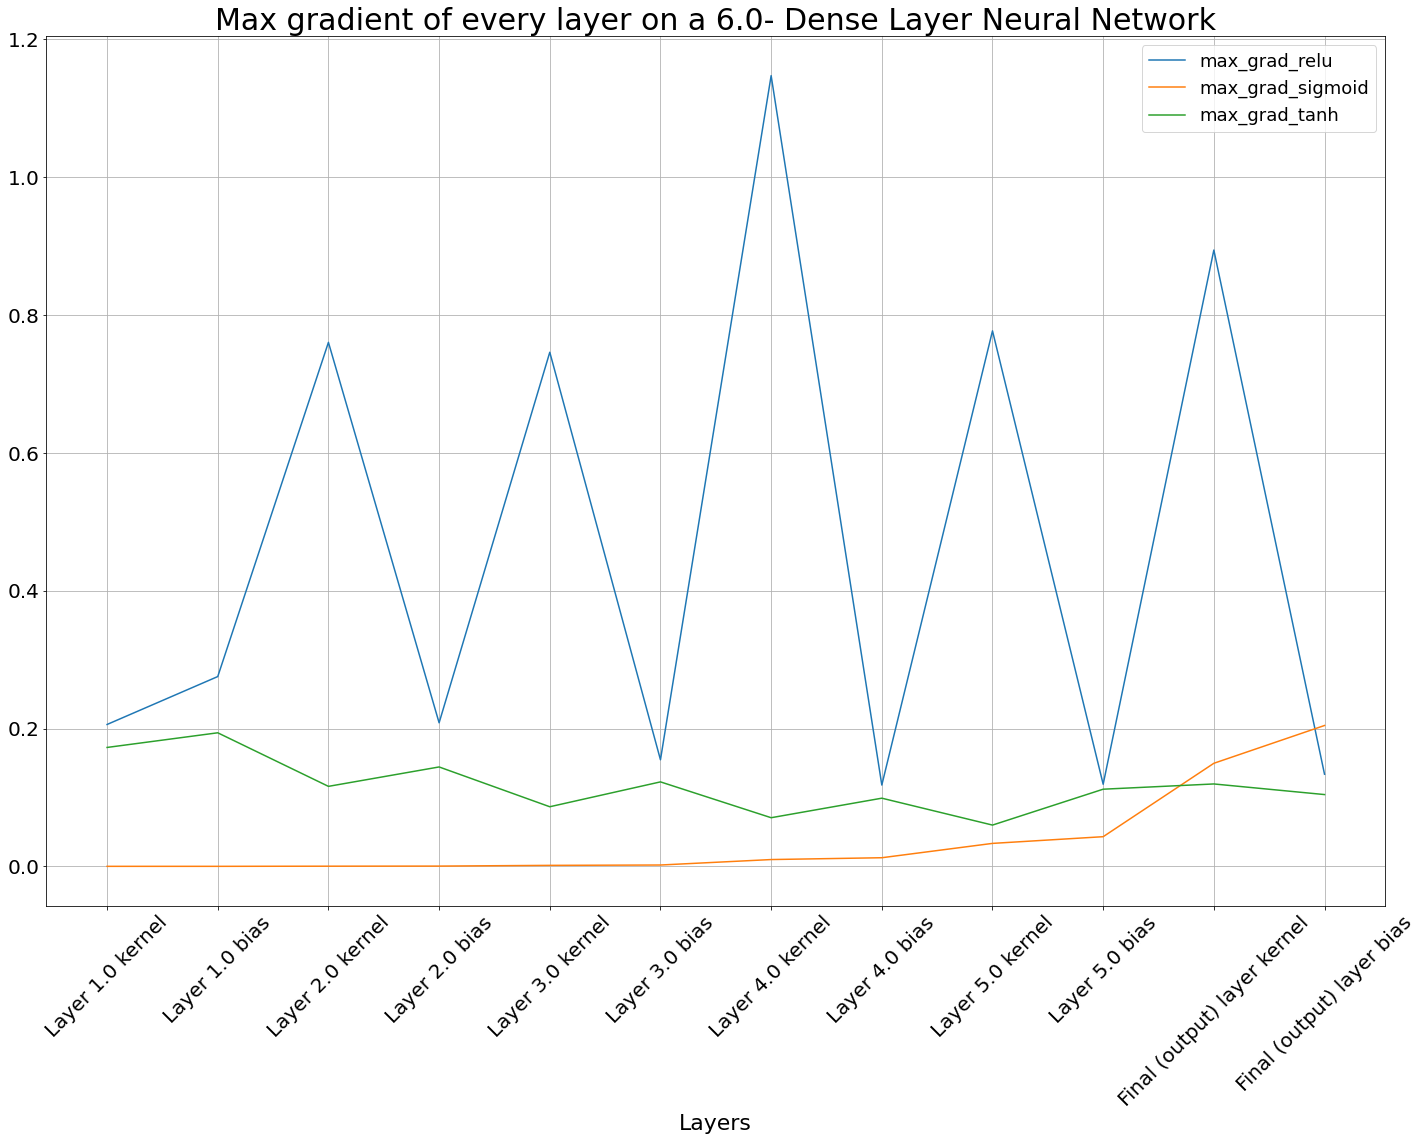

In [22]:
#And now the plotting
plot_the_max(relu_max,sigmoid_max,tanh_max)









Then with the implementaion of the models with 20 intermediate dense layers

In [23]:
print('Start of the relu model\n')
relu_max=Model_20_Layers ('relu')
print('\n')
print('\n')
print('-------------------------------------------------------')
print('Start of the sigmoid model\n')
sigmoid_max=Model_20_Layers ('sigmoid')
print('\n')
print('\n')
print('-------------------------------------------------------')
print('Start of the tanh model\n')
tanh_max=Model_20_Layers ('tanh')



Start of the relu model


Start of epoch 1
Training loss (for one batch) at step 0: 2.3025
Seen so far: 64 samples
Training loss (for one batch) at step 200: 2.2996
Seen so far: 12864 samples
Training loss (for one batch) at step 400: 2.3041
Seen so far: 25664 samples
Training loss (for one batch) at step 600: 2.3003
Seen so far: 38464 samples
Training loss (for one batch) at step 800: 2.3004
Seen so far: 51264 samples

Start of epoch 2
Training loss (for one batch) at step 0: 2.2976
Seen so far: 64 samples
Training loss (for one batch) at step 200: 2.2978
Seen so far: 12864 samples
Training loss (for one batch) at step 400: 2.2853
Seen so far: 25664 samples
Training loss (for one batch) at step 600: 2.2595
Seen so far: 38464 samples
Training loss (for one batch) at step 800: 2.2186
Seen so far: 51264 samples

Start of epoch 3
Training loss (for one batch) at step 0: 2.1211
Seen so far: 64 samples
Training loss (for one batch) at step 200: 1.9402
Seen so far: 12864 samples
Training los

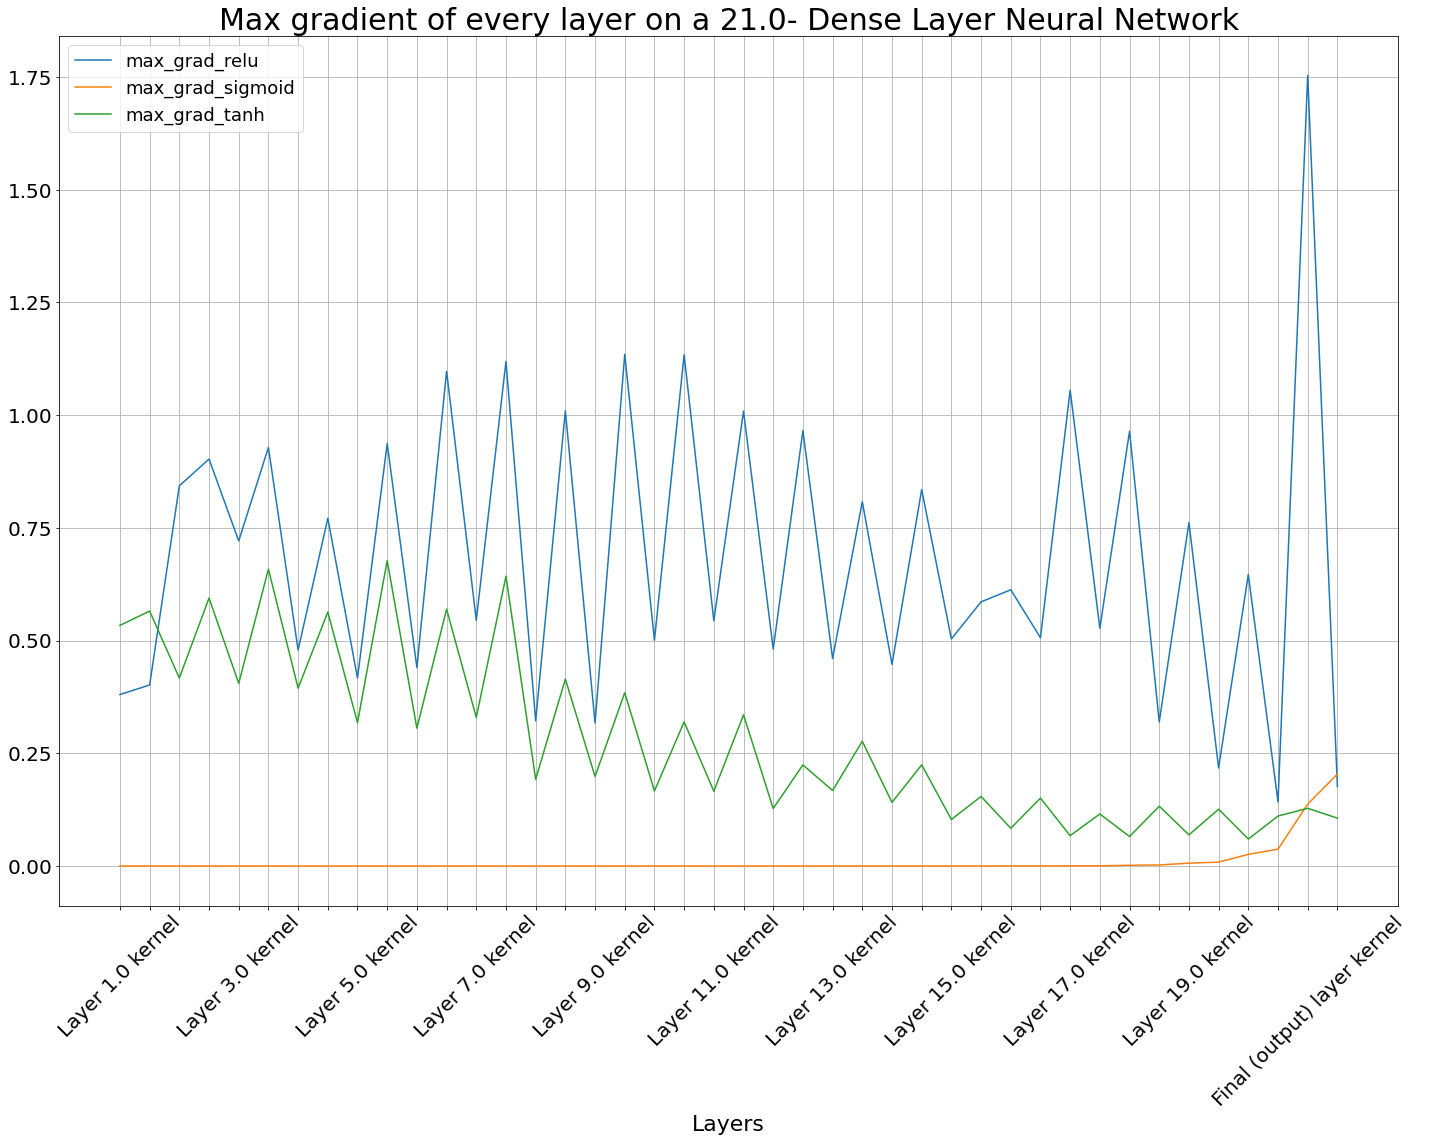

In [24]:
#And now the plotting
plot_the_max(relu_max,sigmoid_max,tanh_max)



Fnally the models with 40 intermediate dense layers

In [25]:
print('Start of the relu model\n')
relu_max=Model_40_Layers ('relu')
print('\n')
print('\n')
print('-------------------------------------------------------')
print('Start of the sigmoid model\n')
sigmoid_max=Model_40_Layers ('sigmoid')
print('\n')
print('\n')
print('-------------------------------------------------------')
print('Start of the tanh model\n')
tanh_max=Model_40_Layers ('tanh')



Start of the relu model


Start of epoch 1
Training loss (for one batch) at step 0: 2.3026
Seen so far: 64 samples
Training loss (for one batch) at step 200: 2.3008
Seen so far: 12864 samples
Training loss (for one batch) at step 400: 2.2998
Seen so far: 25664 samples
Training loss (for one batch) at step 600: 2.3012
Seen so far: 38464 samples
Training loss (for one batch) at step 800: 2.3020
Seen so far: 51264 samples

Start of epoch 2
Training loss (for one batch) at step 0: 2.3016
Seen so far: 64 samples
Training loss (for one batch) at step 200: 2.3091
Seen so far: 12864 samples
Training loss (for one batch) at step 400: 2.3038
Seen so far: 25664 samples
Training loss (for one batch) at step 600: 2.3039
Seen so far: 38464 samples
Training loss (for one batch) at step 800: 2.2972
Seen so far: 51264 samples

Start of epoch 3
Training loss (for one batch) at step 0: 2.3019
Seen so far: 64 samples
Training loss (for one batch) at step 200: 2.2943
Seen so far: 12864 samples
Training los

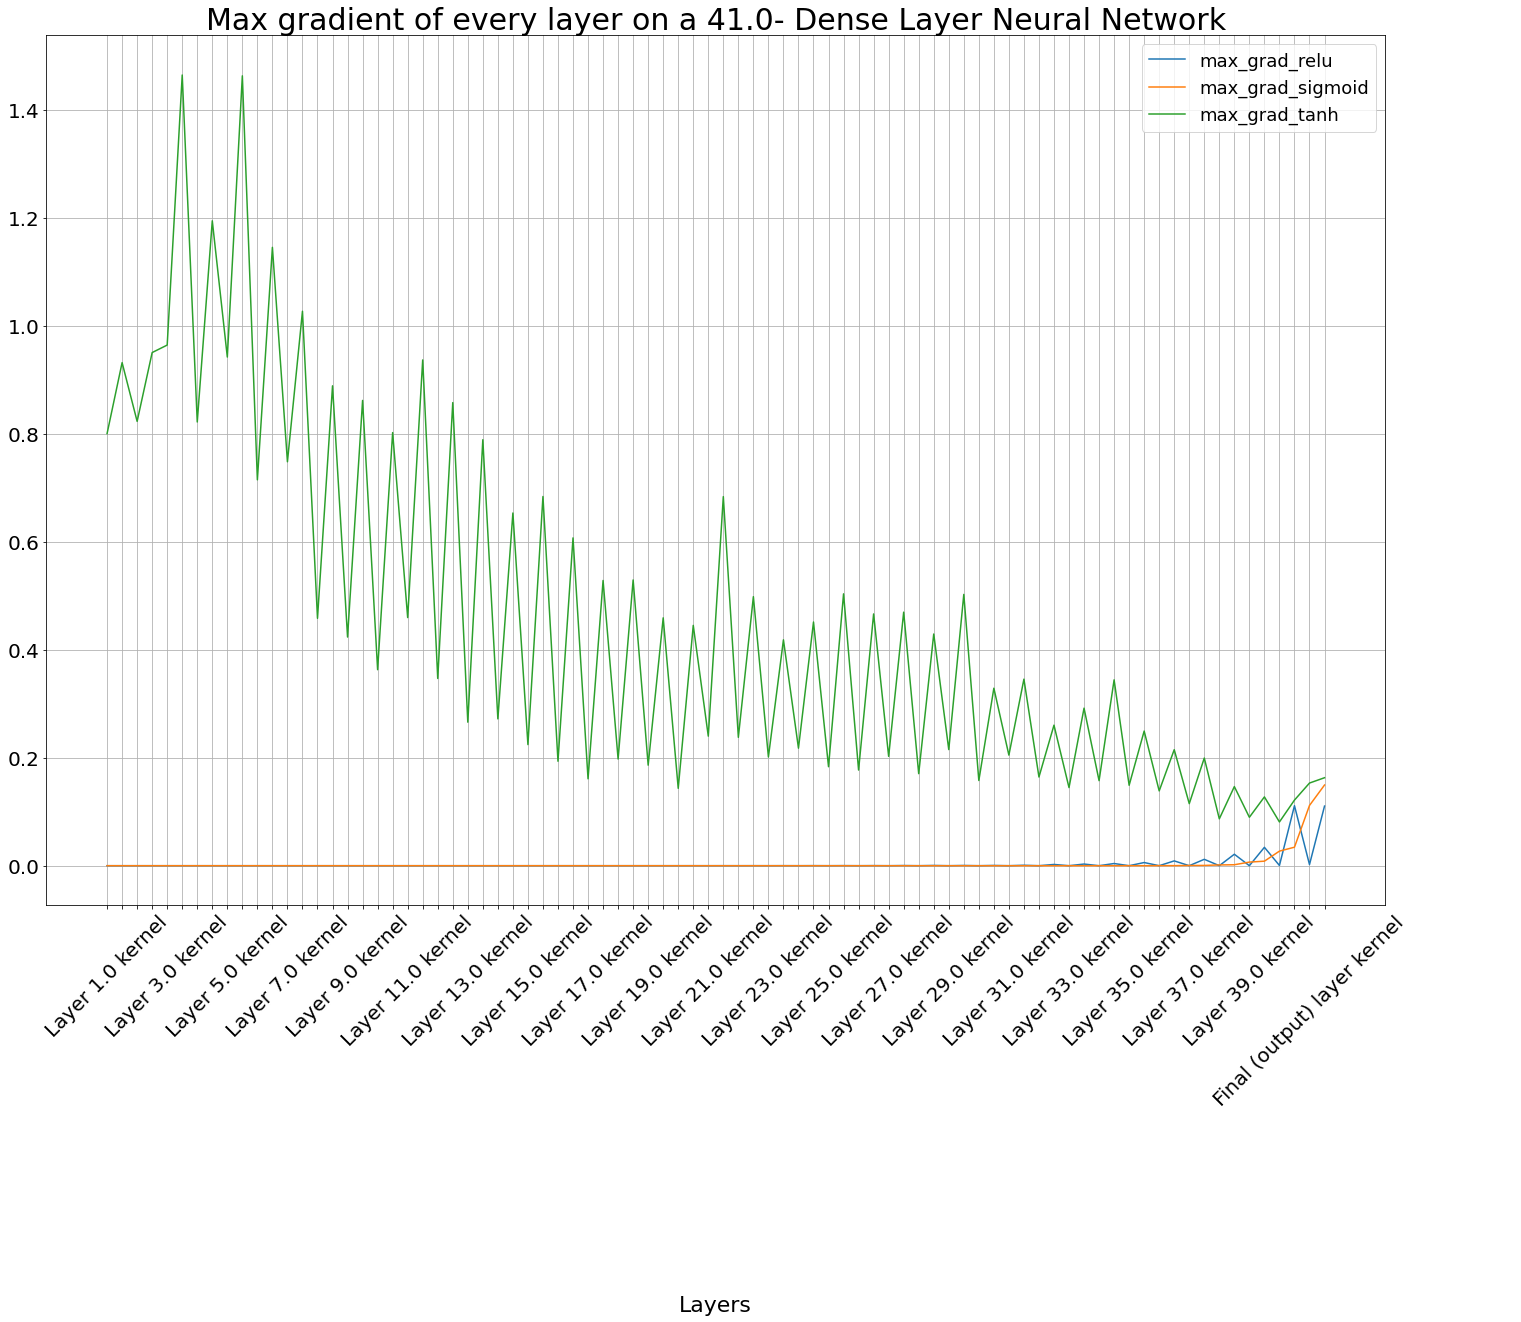

In [26]:
#And now the plotting
plot_the_max(relu_max,sigmoid_max,tanh_max)




As expected, we concluded to the deductions that we had analyzed in cases 1a and 1b. Relu as an activation function in the intermediate layers presented the best behavior by far when intermediate layers were up to 20. But with 40 intemediate layers, its results were really poor and far worse than tanh function's. This is probably due to the fact that with so many layers, and since the derivative of ReLU is zero when x < 0, certain weights can be “killed off” or become “dead” during back propagation. This is because the back-propagated error can be cancelled out whenever there is a negative input into a given neuron and therefore the gradient of that term will also fall to zero. This means there is no way for the associated weights to update in the right direction. This can obviously impact learning. So with 40 layers overall, probably in the chain of calculations some inputs would be less than zero, leading the derivative of the function to be zero, and therefore kill the learning procedure and the update of certain weights of the model. 

D)

Firstly let's visualize Lecun Function and its derivative

C:\Users\kosta\anaconda3\lib\site-packages\ipykernel_launcher.py:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


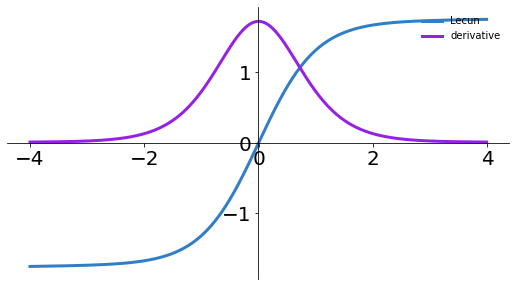

In [27]:
import matplotlib.pyplot as plt
import numpy as np

def Lecun(x):
    tan_h=(np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x)) #hyperbolic tan function
    t=1.7159*(tan_h)+0.01*x #lecun function
    dt=1.7159*(1-tan_h**2)+0.01
    return t,dt

z=np.arange(-4,4,0.01)
Lecun(z)[0].size,Lecun(z)[1].size
# Setup centered axes
fig, ax = plt.subplots(figsize=(9, 5))
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
# Create and show plot
ax.plot(z,Lecun(z)[0], color="#307EC7", linewidth=3, label="Lecun")
ax.plot(z,Lecun(z)[1], color="#9621E2", linewidth=3, label="derivative")
ax.legend(loc="upper right", frameon=False)
fig.show()






Lecun function, is a similar to tanh shaped nonlinear activation function that outputs values between. However, like Relu, it does not  meet the condition that demands that the outcome of the activation function must be upper and lower - bounded since it can output values from -oo to +oo (although its absolute value increases in a much slower pace than relu since the coefficient of x equals to 0.01).  

The functiion's output is f(x) = 1.7159*(tanh) +0.01*x  and its gradient is f' (x) = 1.7159*( 1 – (tanh)^2 )+0.01. So, the gradient's range lies from 0.01 to 1.7259.  

Areas close (but really close) to zero, manage to have derivatives close or even bigger than 1, so that when back propagating the learning value does not diminish as much as the sigmoid function. But still, the problem remains when recieving inputs away from zero (especially when |x| >1, as shown in the diagram above 


In order to compare the learning curves of the models using LeCun and hyperbolic tangent activation functions, we will exploit the results from the models trained in 1b with tanh functions. Then we will create models of the same architecture, but their inner dense layers will use lecun as their activation function

In [28]:
#Firstly we create a slightly different lecun function than before that only returns the function itself and not its derivative
#as well
from keras import backend as K
def Lecun_(x):
    tan_h=K.tanh(x) #hyperbolic tan function
    t=1.7159*(tan_h)+0.01*x #lecun function
    return t

In [29]:
#Model_Lecun_5

import keras.layers as l
import keras.models as m
import keras.optimizers as o
import tensorflow as tf 


Model_lecun_5 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28,1)),
  tf.keras.layers.Dense(32, activation=Lecun_),
      tf.keras.layers.Dense(32, activation=Lecun_),
      tf.keras.layers.Dense(32, activation=Lecun_),
      tf.keras.layers.Dense(32, activation=Lecun_),
      tf.keras.layers.Dense(32, activation=Lecun_),
  tf.keras.layers.Dense(10, activation='softmax')
])
Model_lecun_5 .compile(
    loss='categorical_crossentropy',
    optimizer= tf.keras.optimizers.SGD(learning_rate=0.01),
    metrics=["accuracy"]
)

Model_lecun_5 .summary()

history_model_lecun_5=Model_lecun_5 .fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=50,
    validation_data=(x_test, y_test)
)

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_18 (Flatten)        (None, 784)               0         
                                                                 
 dense_408 (Dense)           (None, 32)                25120     
                                                                 
 dense_409 (Dense)           (None, 32)                1056      
                                                                 
 dense_410 (Dense)           (None, 32)                1056      
                                                                 
 dense_411 (Dense)           (None, 32)                1056      
                                                                 
 dense_412 (Dense)           (None, 32)                1056      
                                                                 
 dense_413 (Dense)           (None, 10)              

Epoch 49/50
938/938 [==============================] - 5s 5ms/step - loss: 0.0167 - accuracy: 0.9963 - val_loss: 0.1313 - val_accuracy: 0.9672
Epoch 50/50
938/938 [==============================] - 5s 5ms/step - loss: 0.0159 - accuracy: 0.9969 - val_loss: 0.1289 - val_accuracy: 0.9692


In [30]:
#Model_Lecun_20

import keras.layers as l
import keras.models as m
import keras.optimizers as o
import tensorflow as tf 


Model_lecun_20 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28,1)),
  tf.keras.layers.Dense(32, activation=Lecun_),
      tf.keras.layers.Dense(32, activation=Lecun_),
      tf.keras.layers.Dense(32, activation=Lecun_),
      tf.keras.layers.Dense(32, activation=Lecun_),
      tf.keras.layers.Dense(32, activation=Lecun_),
      tf.keras.layers.Dense(32, activation=Lecun_),
      tf.keras.layers.Dense(32, activation=Lecun_),
      tf.keras.layers.Dense(32, activation=Lecun_),
      tf.keras.layers.Dense(32, activation=Lecun_),
      tf.keras.layers.Dense(32, activation=Lecun_),
      tf.keras.layers.Dense(32, activation=Lecun_),
      tf.keras.layers.Dense(32, activation=Lecun_),
      tf.keras.layers.Dense(32, activation=Lecun_),
      tf.keras.layers.Dense(32, activation=Lecun_),
      tf.keras.layers.Dense(32, activation=Lecun_),
      tf.keras.layers.Dense(32, activation=Lecun_),
      tf.keras.layers.Dense(32, activation=Lecun_),
      tf.keras.layers.Dense(32, activation=Lecun_),
      tf.keras.layers.Dense(32, activation=Lecun_),
      tf.keras.layers.Dense(32, activation=Lecun_),
  tf.keras.layers.Dense(10, activation='softmax')
])
Model_lecun_20 .compile(
    loss='categorical_crossentropy',
    optimizer= tf.keras.optimizers.SGD(learning_rate=0.01),
    metrics=["accuracy"]
)

Model_lecun_20 .summary()

history_model_lecun_20=Model_lecun_20 .fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=50,
    validation_data=(x_test, y_test)
)

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_19 (Flatten)        (None, 784)               0         
                                                                 
 dense_414 (Dense)           (None, 32)                25120     
                                                                 
 dense_415 (Dense)           (None, 32)                1056      
                                                                 
 dense_416 (Dense)           (None, 32)                1056      
                                                                 
 dense_417 (Dense)           (None, 32)                1056      
                                                                 
 dense_418 (Dense)           (None, 32)                1056      
                                                                 
 dense_419 (Dense)           (None, 32)              

938/938 [==============================] - 8s 8ms/step - loss: 0.0555 - accuracy: 0.9852 - val_loss: 0.1561 - val_accuracy: 0.9645
Epoch 36/50
938/938 [==============================] - 8s 9ms/step - loss: 0.0546 - accuracy: 0.9848 - val_loss: 0.1676 - val_accuracy: 0.9632
Epoch 37/50
938/938 [==============================] - 8s 9ms/step - loss: 0.0554 - accuracy: 0.9848 - val_loss: 0.1597 - val_accuracy: 0.9640
Epoch 38/50
938/938 [==============================] - 8s 9ms/step - loss: 0.0519 - accuracy: 0.9859 - val_loss: 0.1651 - val_accuracy: 0.9636
Epoch 39/50
938/938 [==============================] - 8s 8ms/step - loss: 0.0530 - accuracy: 0.9857 - val_loss: 0.1805 - val_accuracy: 0.9606
Epoch 40/50
938/938 [==============================] - 8s 9ms/step - loss: 0.0562 - accuracy: 0.9841 - val_loss: 0.1748 - val_accuracy: 0.9611
Epoch 41/50
938/938 [==============================] - 8s 8ms/step - loss: 0.0505 - accuracy: 0.9862 - val_loss: 0.1630 - val_accuracy: 0.9653
Epoch 42/50

In [31]:
#Model_Lecun_40

import keras.layers as l
import keras.models as m
import keras.optimizers as o
import tensorflow as tf 


Model_lecun_40 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28,1)),
  tf.keras.layers.Dense(32, activation=Lecun_),
      tf.keras.layers.Dense(32, activation=Lecun_),
      tf.keras.layers.Dense(32, activation=Lecun_),
      tf.keras.layers.Dense(32, activation=Lecun_),
      tf.keras.layers.Dense(32, activation=Lecun_),
      tf.keras.layers.Dense(32, activation=Lecun_),
      tf.keras.layers.Dense(32, activation=Lecun_),
      tf.keras.layers.Dense(32, activation=Lecun_),
      tf.keras.layers.Dense(32, activation=Lecun_),
      tf.keras.layers.Dense(32, activation=Lecun_),
      tf.keras.layers.Dense(32, activation=Lecun_),
      tf.keras.layers.Dense(32, activation=Lecun_),
      tf.keras.layers.Dense(32, activation=Lecun_),
      tf.keras.layers.Dense(32, activation=Lecun_),
      tf.keras.layers.Dense(32, activation=Lecun_),
      tf.keras.layers.Dense(32, activation=Lecun_),
      tf.keras.layers.Dense(32, activation=Lecun_),
      tf.keras.layers.Dense(32, activation=Lecun_),
      tf.keras.layers.Dense(32, activation=Lecun_),
      tf.keras.layers.Dense(32, activation=Lecun_),
     tf.keras.layers.Dense(32, activation=Lecun_),
      tf.keras.layers.Dense(32, activation=Lecun_),
      tf.keras.layers.Dense(32, activation=Lecun_),
      tf.keras.layers.Dense(32, activation=Lecun_),
      tf.keras.layers.Dense(32, activation=Lecun_),
      tf.keras.layers.Dense(32, activation=Lecun_),
      tf.keras.layers.Dense(32, activation=Lecun_),
      tf.keras.layers.Dense(32, activation=Lecun_),
      tf.keras.layers.Dense(32, activation=Lecun_),
      tf.keras.layers.Dense(32, activation=Lecun_),
      tf.keras.layers.Dense(32, activation=Lecun_),
      tf.keras.layers.Dense(32, activation=Lecun_),
      tf.keras.layers.Dense(32, activation=Lecun_),
      tf.keras.layers.Dense(32, activation=Lecun_),
      tf.keras.layers.Dense(32, activation=Lecun_),
      tf.keras.layers.Dense(32, activation=Lecun_),
      tf.keras.layers.Dense(32, activation=Lecun_),
      tf.keras.layers.Dense(32, activation=Lecun_),
      tf.keras.layers.Dense(32, activation=Lecun_),
      tf.keras.layers.Dense(32, activation=Lecun_),
  tf.keras.layers.Dense(10, activation='softmax')
])
Model_lecun_40 .compile(
    loss='categorical_crossentropy',
    optimizer= tf.keras.optimizers.SGD(learning_rate=0.01),
    metrics=["accuracy"]
)

Model_lecun_40 .summary()

history_model_lecun_40=Model_lecun_40 .fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=50,
    validation_data=(x_test, y_test)
)

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_20 (Flatten)        (None, 784)               0         
                                                                 
 dense_435 (Dense)           (None, 32)                25120     
                                                                 
 dense_436 (Dense)           (None, 32)                1056      
                                                                 
 dense_437 (Dense)           (None, 32)                1056      
                                                                 
 dense_438 (Dense)           (None, 32)                1056      
                                                                 
 dense_439 (Dense)           (None, 32)                1056      
                                                                 
 dense_440 (Dense)           (None, 32)              

Then we will create a function that will recieve as input the history (fit) of two models and will return the learning curves (training and validation loss) for both models in the same grid

In [32]:
#please insert history_1 for the model with tanh functions and history_2 for the model with Lecun function
def plot_loss (history_1,history_2):
    # summarize history for loss
    mpl.rc('ytick', labelsize=20) 
    mpl.rc('xtick', labelsize=20) 
    plt.figure(figsize=(24,16))
    plt.plot(history_1.history['loss'])
    plt.plot(history_1.history['val_loss'])
    plt.plot(history_2.history['loss'])
    plt.plot(history_2.history['val_loss'])
    title='model tanh loss vs model lecun loss'
    plt.title(title, fontsize=30)
    plt.ylabel('loss', fontsize=22)
    plt.xlabel('epoch', fontsize=22)
    plt.legend(['train_tanh', 'test_tanh','train_lecun', 'test_lecun'], loc='upper left',fontsize=18)
    plt.grid()
    plt.show()
    # summarize history for accuracy
    mpl.rc('ytick', labelsize=20) 
    mpl.rc('xtick', labelsize=20) 
    plt.figure(figsize=(24,16))
    plt.plot(history_1.history['accuracy'])
    plt.plot(history_1.history['val_accuracy'])
    plt.plot(history_2.history['accuracy'])
    plt.plot(history_2.history['val_accuracy'])
    title='model tanh accuracy vs model lecun accuracy'
    plt.title(title, fontsize=30)
    plt.ylabel('accuracy', fontsize=22)
    plt.xlabel('epoch', fontsize=22)
    plt.legend(['train_tanh', 'test_tanh','train_lecun', 'test_lecun'], loc='upper left',fontsize=18)
    plt.grid()
    plt.show()

And now the plotting. Firstly for the models with 5 inner layers

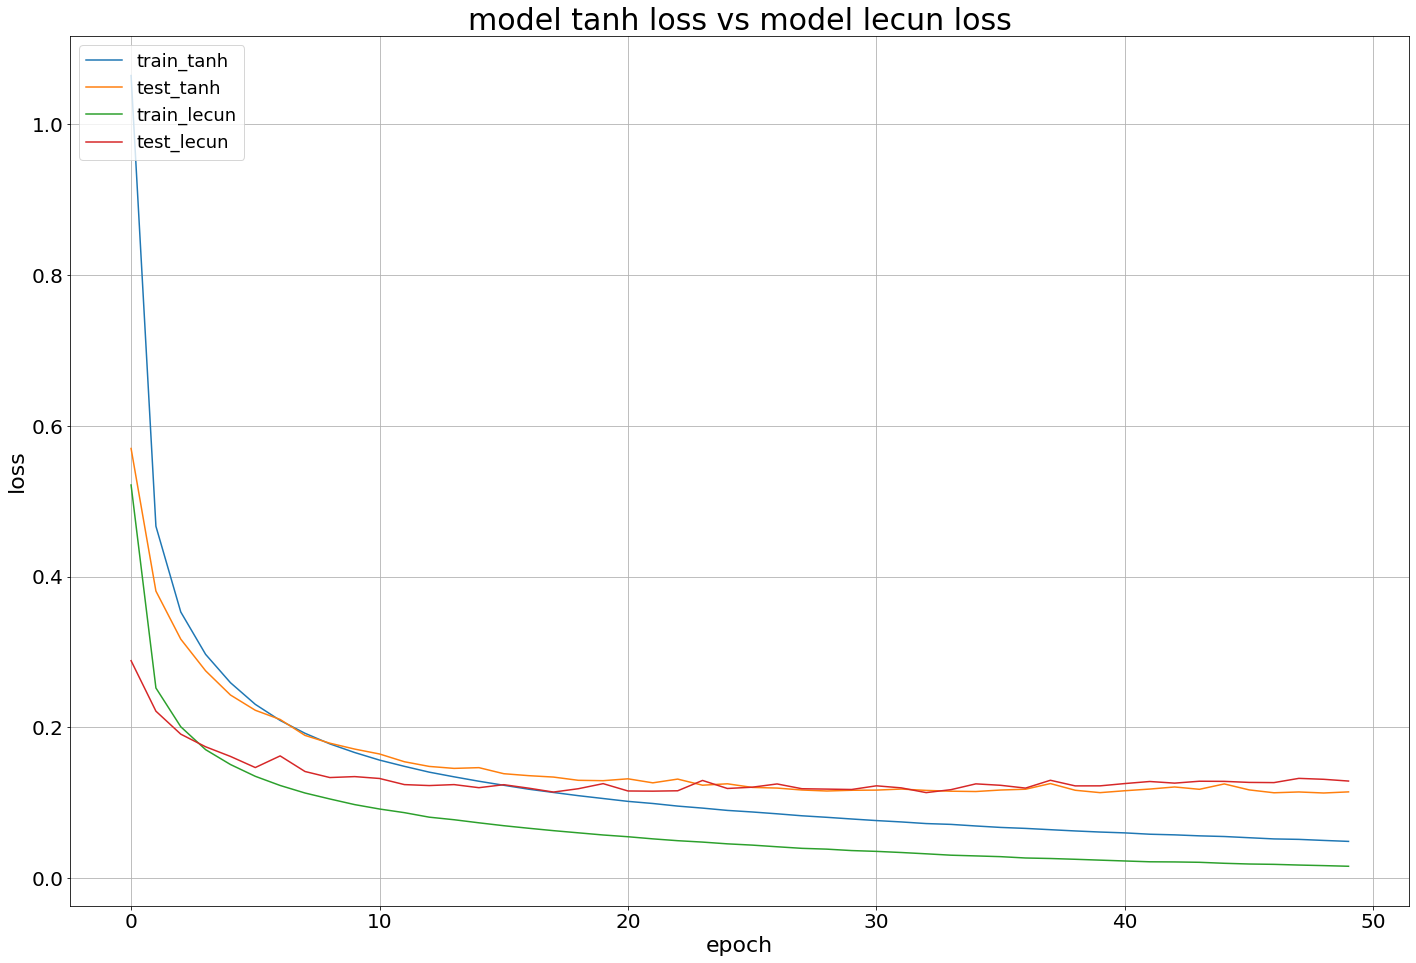

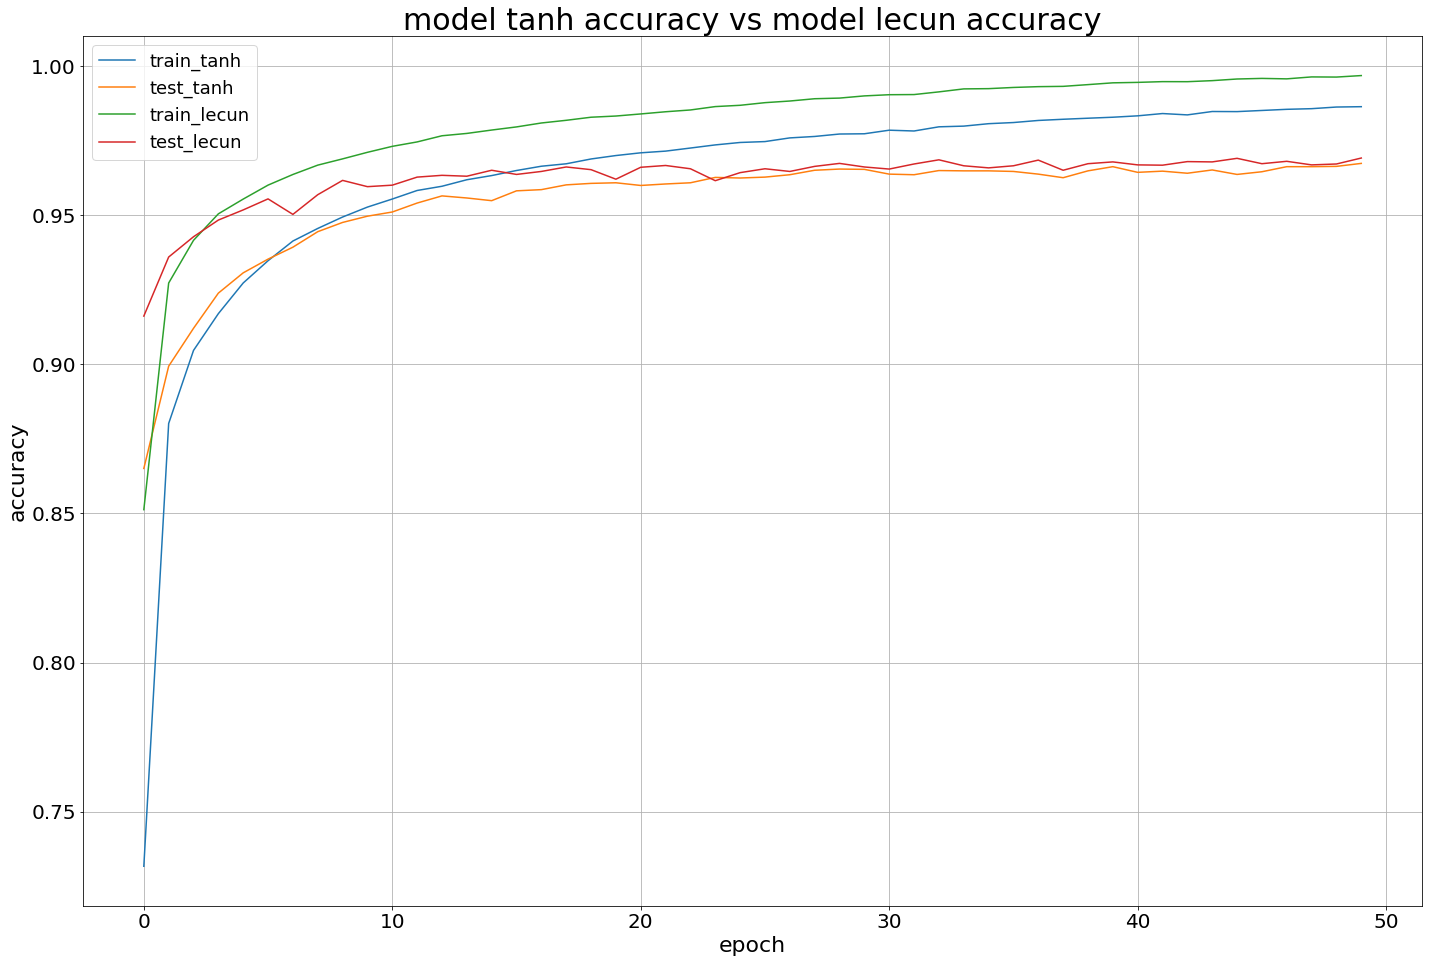

In [33]:
plot_loss(history_model_hyper_5,history_model_lecun_5)

Then for the models with 20 inner Dense layers

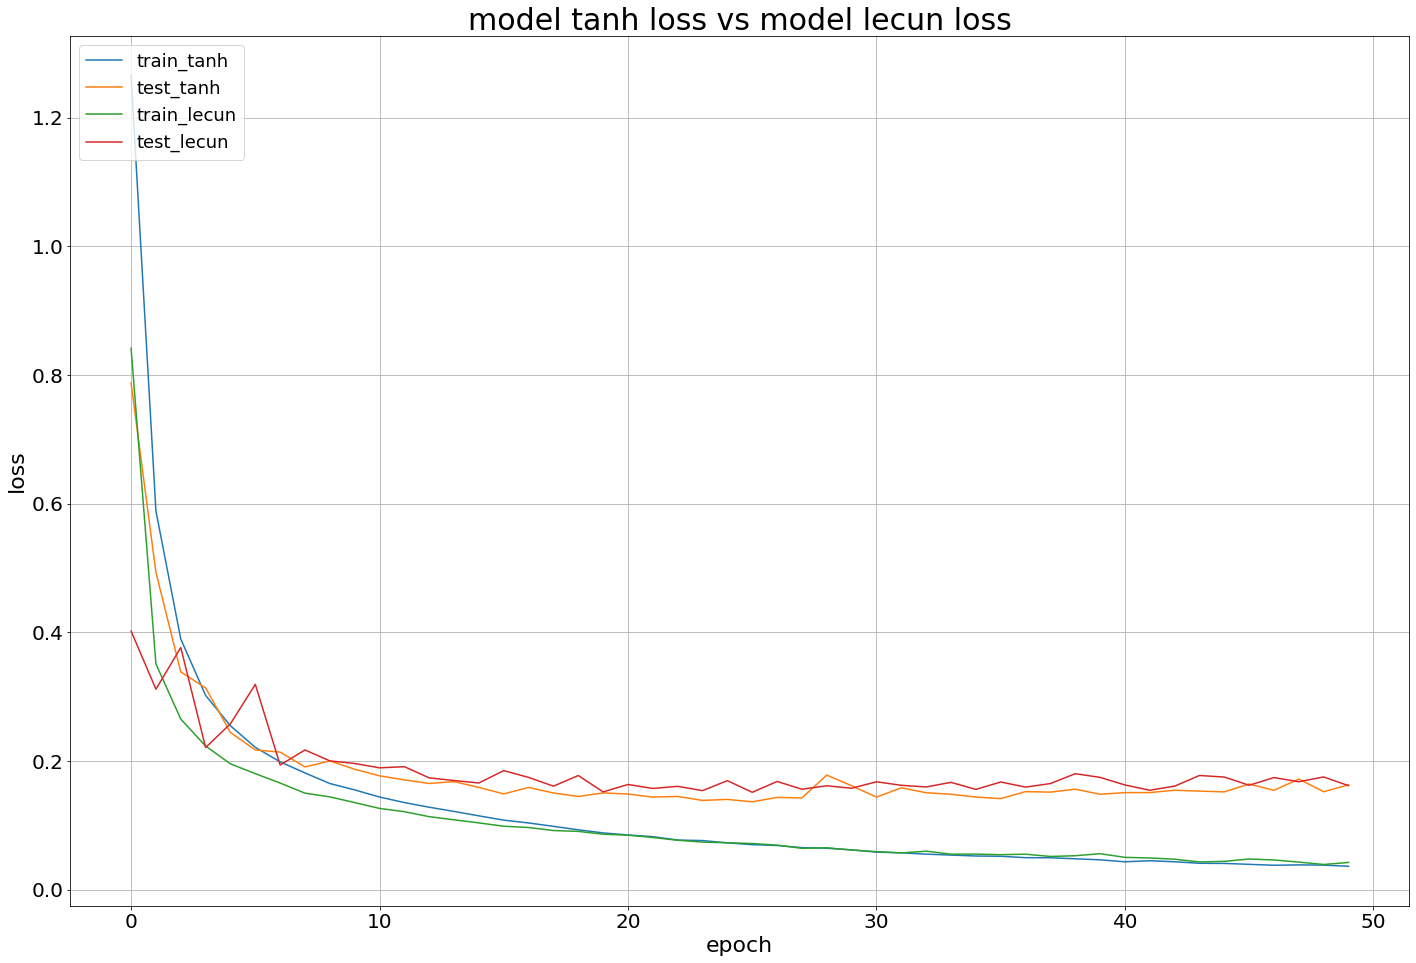

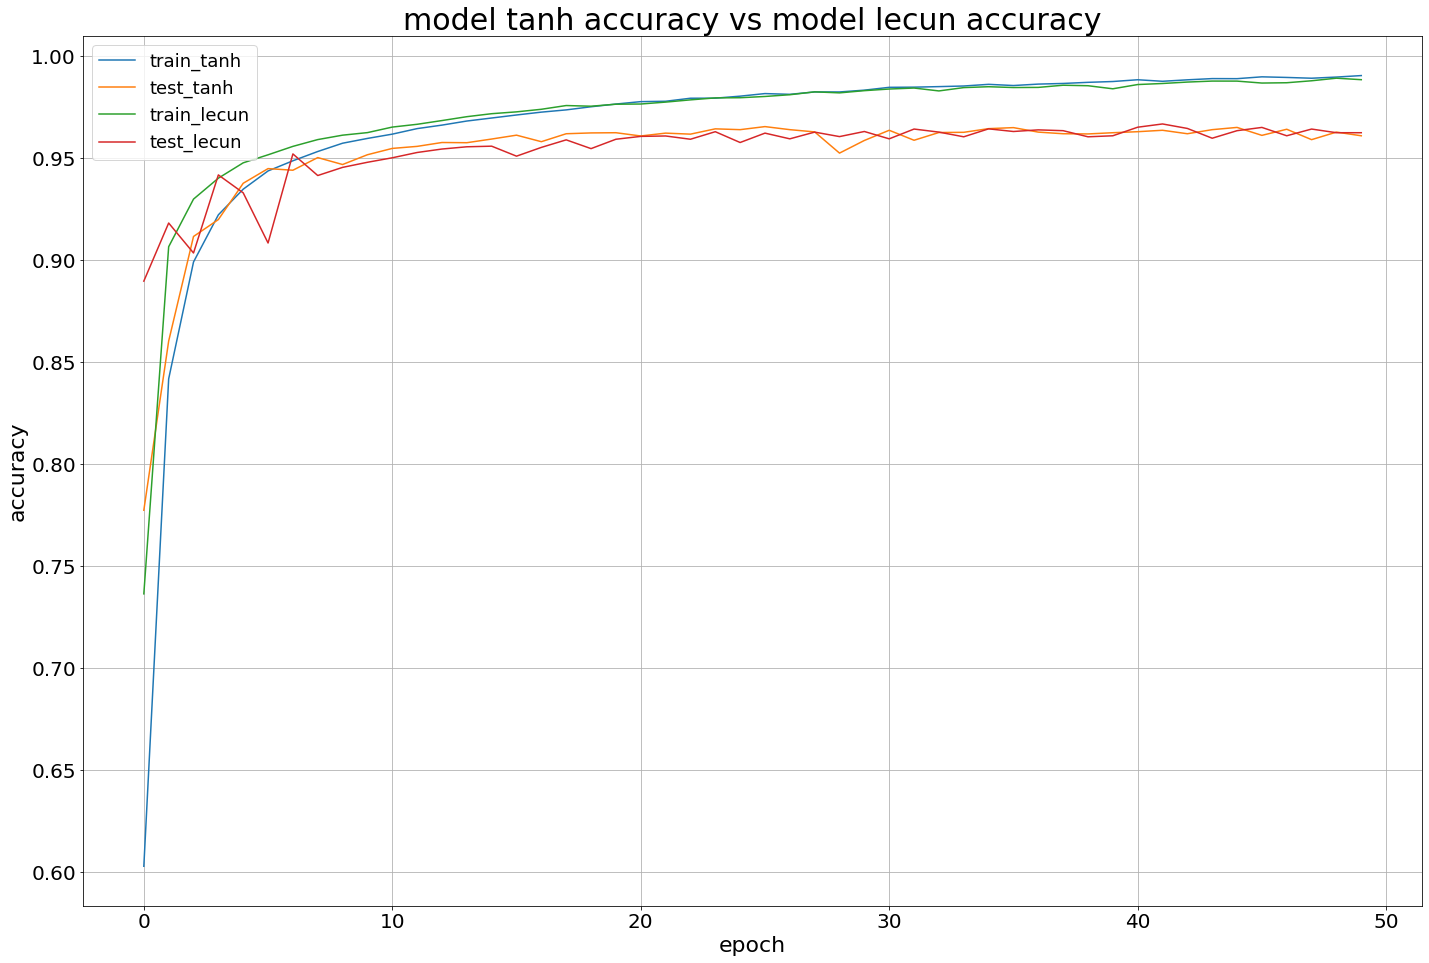

In [34]:
plot_loss(history_model_hyper_20,history_model_lecun_20)

Finally for the models with 40 inner dense layers

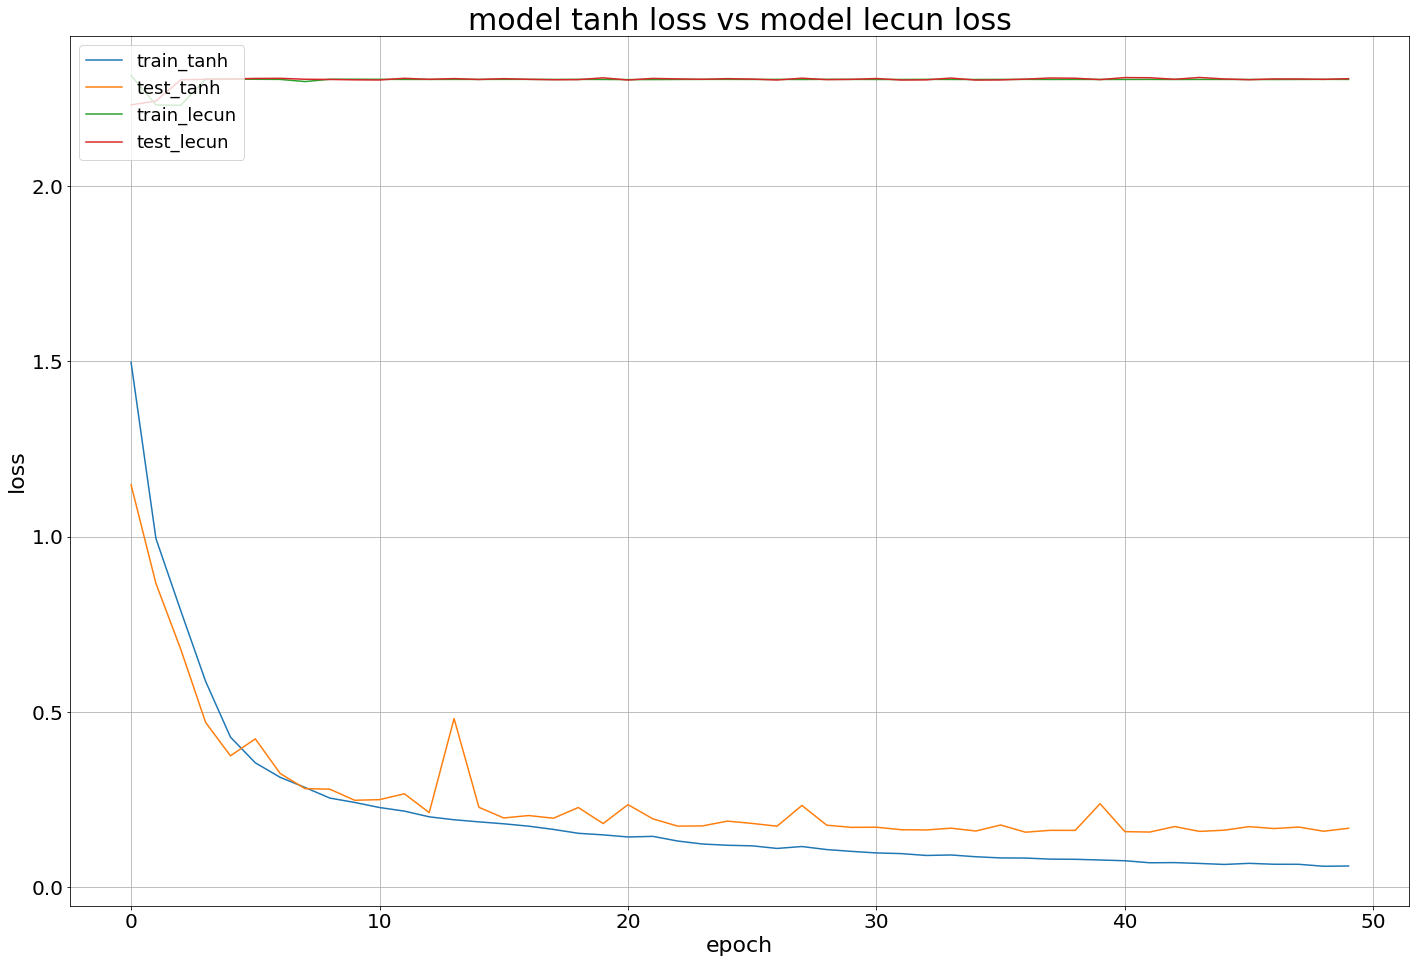

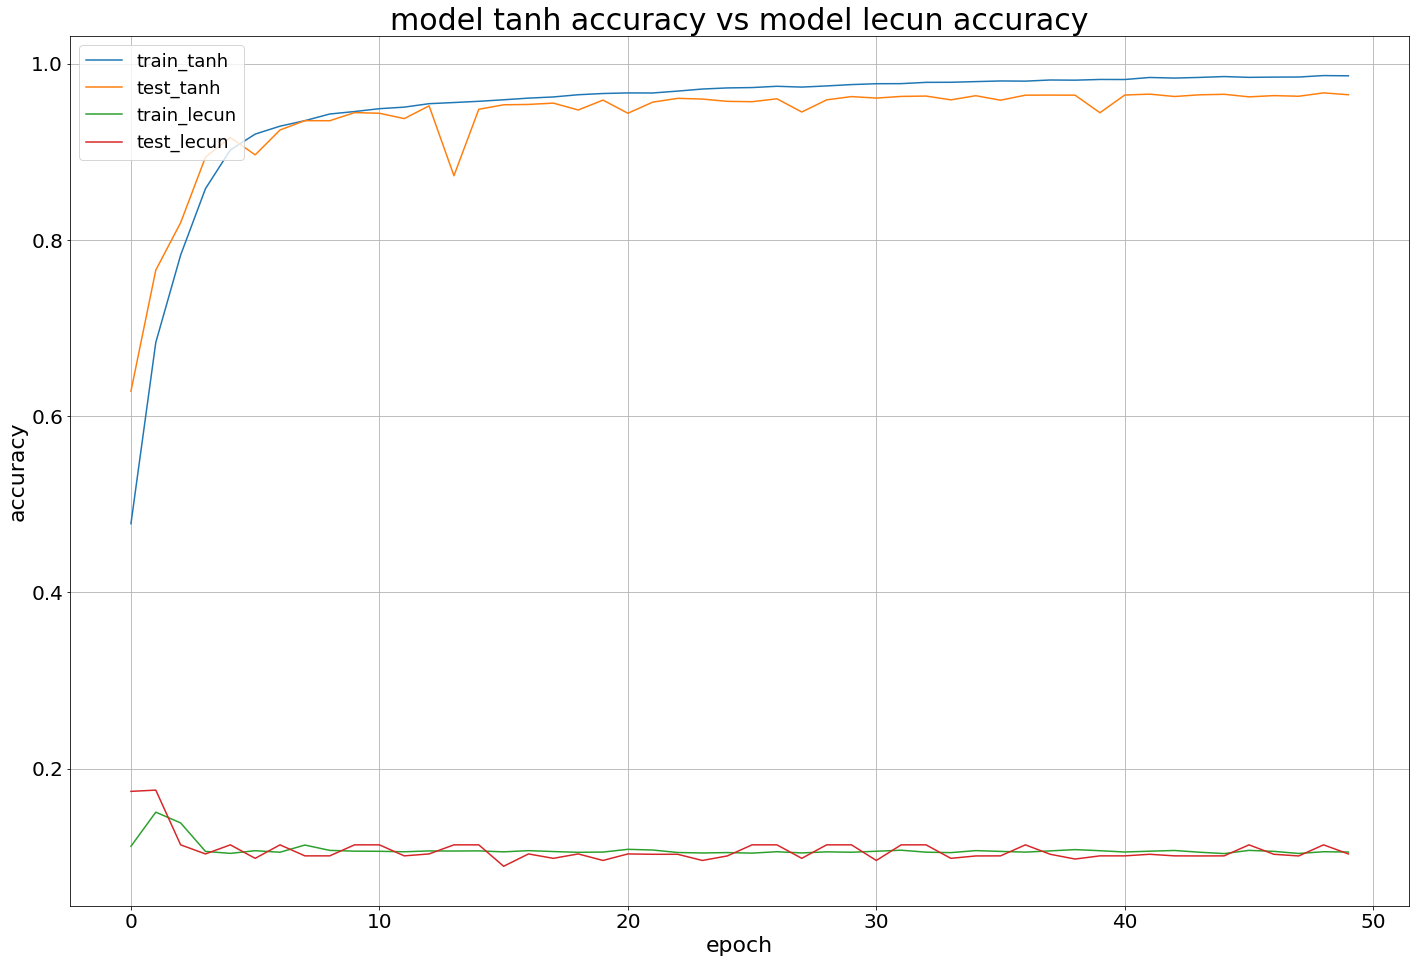

In [35]:
plot_loss(history_model_hyper_40,history_model_lecun_40)

Now we are going to plot the gradients for the choices of depth given above for models using LeCun and hyperbolic tangent activations. We are going to use the functions deployed in 1)c)  and we will create a new function for plotting in the same plot all the maximum gradients of each layer of networks of the same layer - length


In [36]:
def plot_the_max_2(tanh,lecun):
    # This function plots in the same plot all the maximum gradients of each layer of networks of the same layer -length. It
    #takes as input three lists of the maximum of the gradients of all three networks (each network differs in the 
    #activation function of the inner dense layers) and plot them 
    data={'max_grad_tanh':tanh,'max_grad_lecun':lecun}
    titles=[]
    for j in range(1,len(tanh)+1):
        if j<len(tanh)-1:
            if j%2==1:
                layer_no=(j+1)/2
                titles.append('Layer '+str(layer_no)+' kernel')
            else:
                layer_no=(j)/2
                titles.append('Layer '+str(layer_no)+' bias')
        else:
            if j%2==1:
                titles.append('Final (output) layer kernel')
            else:
                titles.append('Final (output) layer bias')
                
    
    df=pd.DataFrame(data,index=titles)
    layer_len=len(tanh)/2
    title='Max gradient of every layer on a '+ str(layer_len)+ '- Dense Layer Neural Network'
    if layer_len<20:
        mpl.rc('ytick', labelsize=20) 
        mpl.rc('xtick', labelsize=20) 
        plt.figure(figsize=(24,16))
        plt.plot(df)
        plt.xticks(rotation=45)
        plt.grid()
        plt.legend(df.columns[:],fontsize=18)
        plt.title(title, fontsize=30)
        plt.xlabel('Layers', fontsize=22)
        plt.show()
    else:
        x_axis=list(df.index)
        for count in range (1,len(x_axis)):
            if count%4!=0:
                x_axis[count]=count*' '
        df.index=x_axis
        mpl.rc('ytick', labelsize=20) 
        mpl.rc('xtick', labelsize=20) 
        plt.figure(figsize=(24,16))
        plt.plot(df)
        plt.xticks(rotation=45)
        plt.grid()
        plt.legend(df.columns,fontsize=18)
        plt.title(title, fontsize=30)
        plt.xlabel('Layers', fontsize=22)
        plt.show()
 

Now let's start with the implementation of the above functions. Fristly for the models with 5 intermediate dense layers

In [37]:
print('Start of the tanh model\n')
print('\n')
tanh_max=Model_5_Layers ('tanh')
print('\n')
print('\n')
print('-------------------------------------------------------')
print('Start of the lecun model\n')
lecun_max=Model_5_Layers (Lecun_)

Start of the tanh model




Start of epoch 1


C:\Users\kosta\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1096: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


Training loss (for one batch) at step 0: 2.4025
Seen so far: 64 samples
Training loss (for one batch) at step 200: 1.3115
Seen so far: 12864 samples
Training loss (for one batch) at step 400: 1.0063
Seen so far: 25664 samples
Training loss (for one batch) at step 600: 0.6842
Seen so far: 38464 samples
Training loss (for one batch) at step 800: 0.6662
Seen so far: 51264 samples

Start of epoch 2
Training loss (for one batch) at step 0: 0.5149
Seen so far: 64 samples
Training loss (for one batch) at step 200: 0.4813
Seen so far: 12864 samples
Training loss (for one batch) at step 400: 0.3697
Seen so far: 25664 samples
Training loss (for one batch) at step 600: 0.5451
Seen so far: 38464 samples
Training loss (for one batch) at step 800: 0.4995
Seen so far: 51264 samples

Start of epoch 3
Training loss (for one batch) at step 0: 0.3663
Seen so far: 64 samples
Training loss (for one batch) at step 200: 0.4489
Seen so far: 12864 samples
Training loss (for one batch) at step 400: 0.3388
Seen 

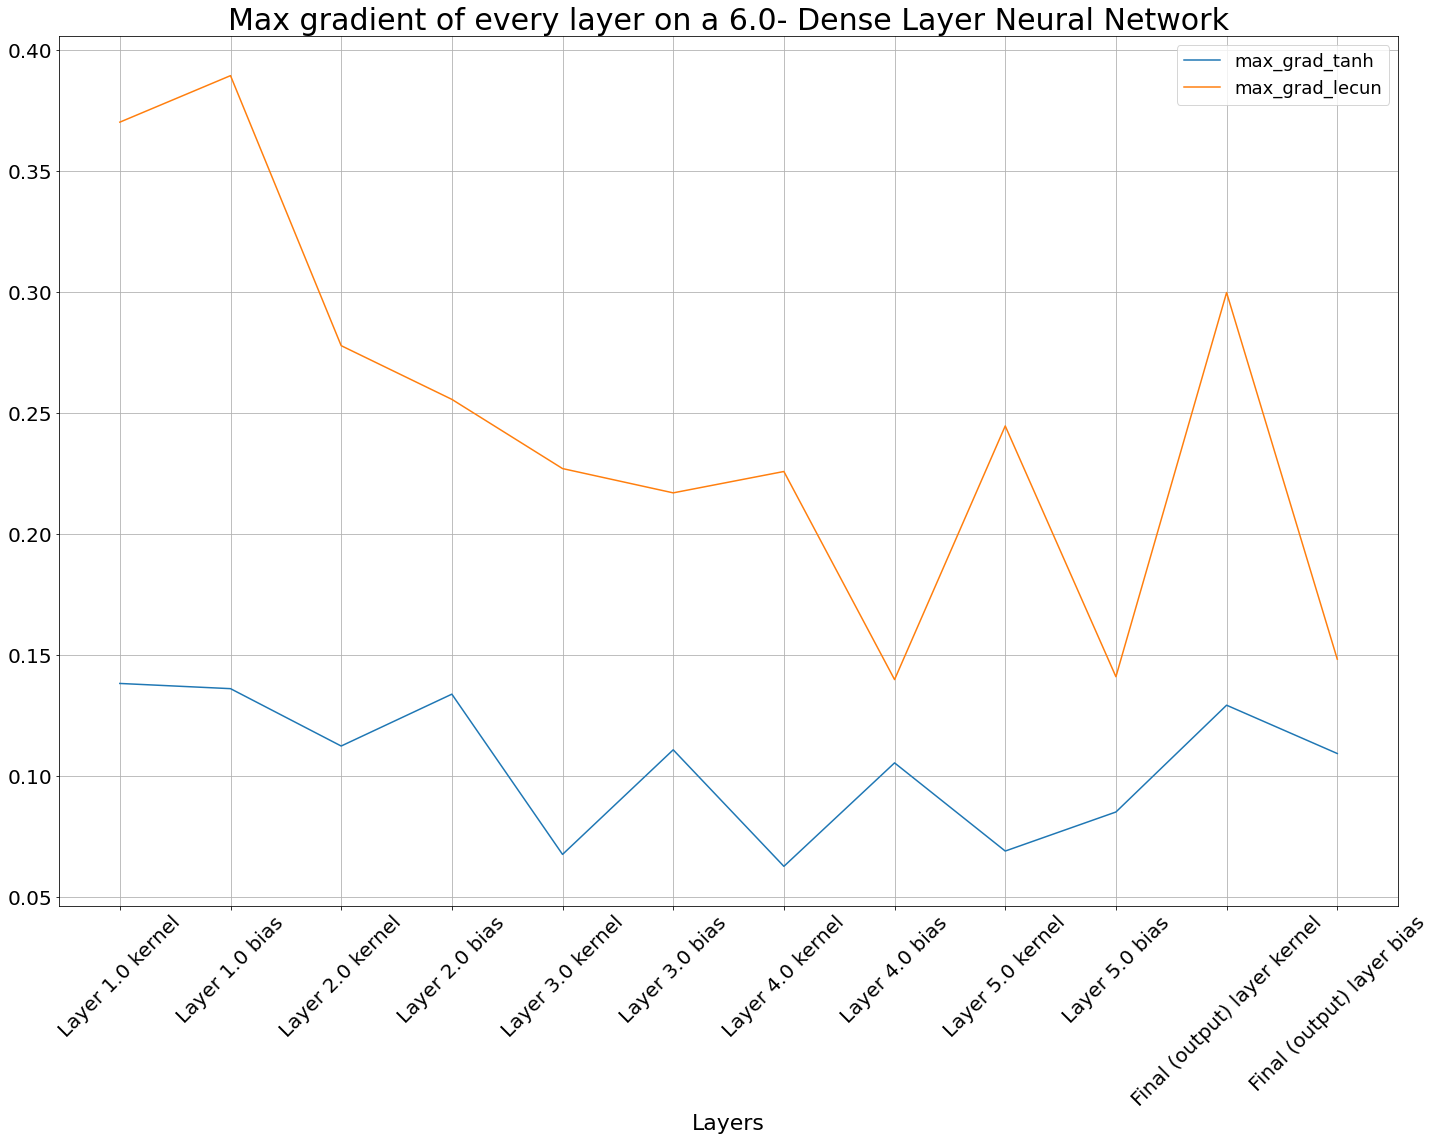

In [38]:
#And now the plotting
plot_the_max_2(tanh_max,lecun_max)

Then the models with 20 intermediate dense layers

In [39]:
print('Start of the tanh model\n')
print('\n')
tanh_max=Model_20_Layers ('tanh')
print('\n')
print('\n')
print('-------------------------------------------------------')
print('Start of the lecun model\n')
lecun_max=Model_20_Layers (Lecun_)

Start of the tanh model




Start of epoch 1
Training loss (for one batch) at step 0: 2.2945
Seen so far: 64 samples
Training loss (for one batch) at step 200: 1.5567
Seen so far: 12864 samples
Training loss (for one batch) at step 400: 1.2867
Seen so far: 25664 samples
Training loss (for one batch) at step 600: 1.1383
Seen so far: 38464 samples
Training loss (for one batch) at step 800: 0.7839
Seen so far: 51264 samples

Start of epoch 2
Training loss (for one batch) at step 0: 0.7044
Seen so far: 64 samples
Training loss (for one batch) at step 200: 0.7943
Seen so far: 12864 samples
Training loss (for one batch) at step 400: 0.6766
Seen so far: 25664 samples
Training loss (for one batch) at step 600: 0.8597
Seen so far: 38464 samples
Training loss (for one batch) at step 800: 0.6845
Seen so far: 51264 samples

Start of epoch 3
Training loss (for one batch) at step 0: 0.4677
Seen so far: 64 samples
Training loss (for one batch) at step 200: 0.4917
Seen so far: 12864 samples
Training l

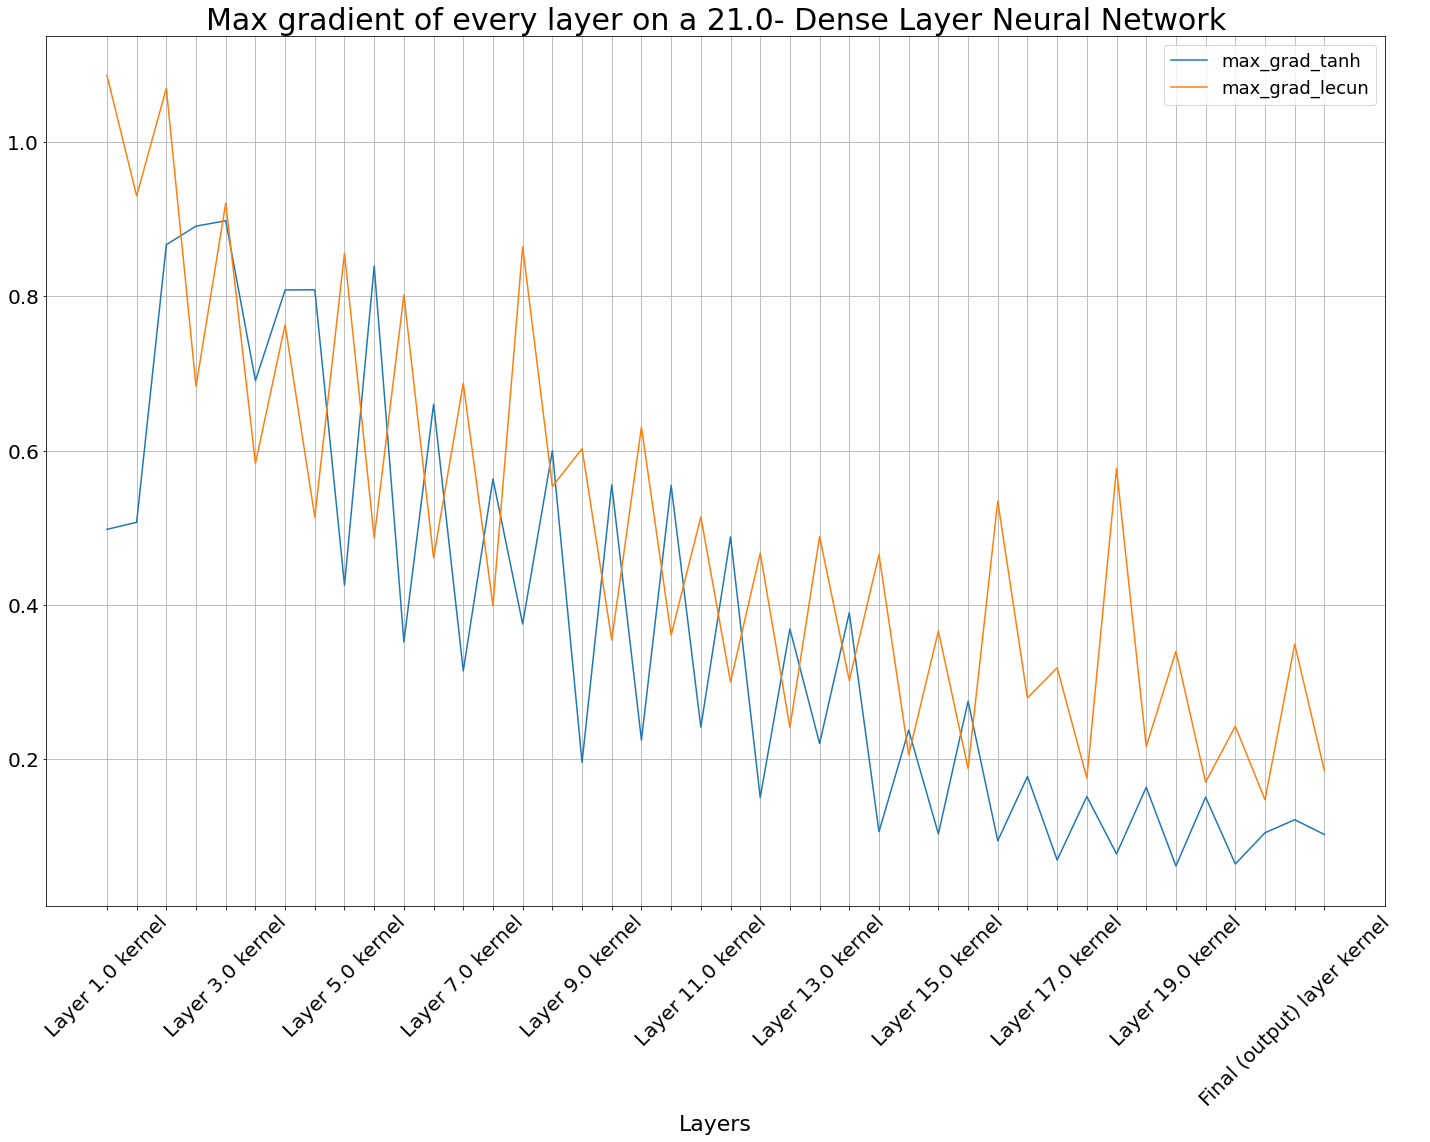

In [40]:
#And now the plotting
plot_the_max_2(tanh_max,lecun_max)

Finally for the models with 40 intermediate dense layers

In [41]:
print('Start of the tanh model\n')
print('\n')
tanh_max=Model_40_Layers ('tanh')
print('\n')
print('\n')
print('-------------------------------------------------------')
print('Start of the lecun model\n')
lecun_max=Model_40_Layers (Lecun_)

Start of the tanh model




Start of epoch 1
Training loss (for one batch) at step 0: 2.3582
Seen so far: 64 samples
Training loss (for one batch) at step 200: 1.9532
Seen so far: 12864 samples
Training loss (for one batch) at step 400: 1.5584
Seen so far: 25664 samples
Training loss (for one batch) at step 600: 1.4901
Seen so far: 38464 samples
Training loss (for one batch) at step 800: 1.2967
Seen so far: 51264 samples

Start of epoch 2
Training loss (for one batch) at step 0: 1.3086
Seen so far: 64 samples
Training loss (for one batch) at step 200: 0.9985
Seen so far: 12864 samples
Training loss (for one batch) at step 400: 1.1153
Seen so far: 25664 samples
Training loss (for one batch) at step 600: 1.0505
Seen so far: 38464 samples
Training loss (for one batch) at step 800: 1.0073
Seen so far: 51264 samples

Start of epoch 3
Training loss (for one batch) at step 0: 0.8670
Seen so far: 64 samples
Training loss (for one batch) at step 200: 0.7773
Seen so far: 12864 samples
Training l

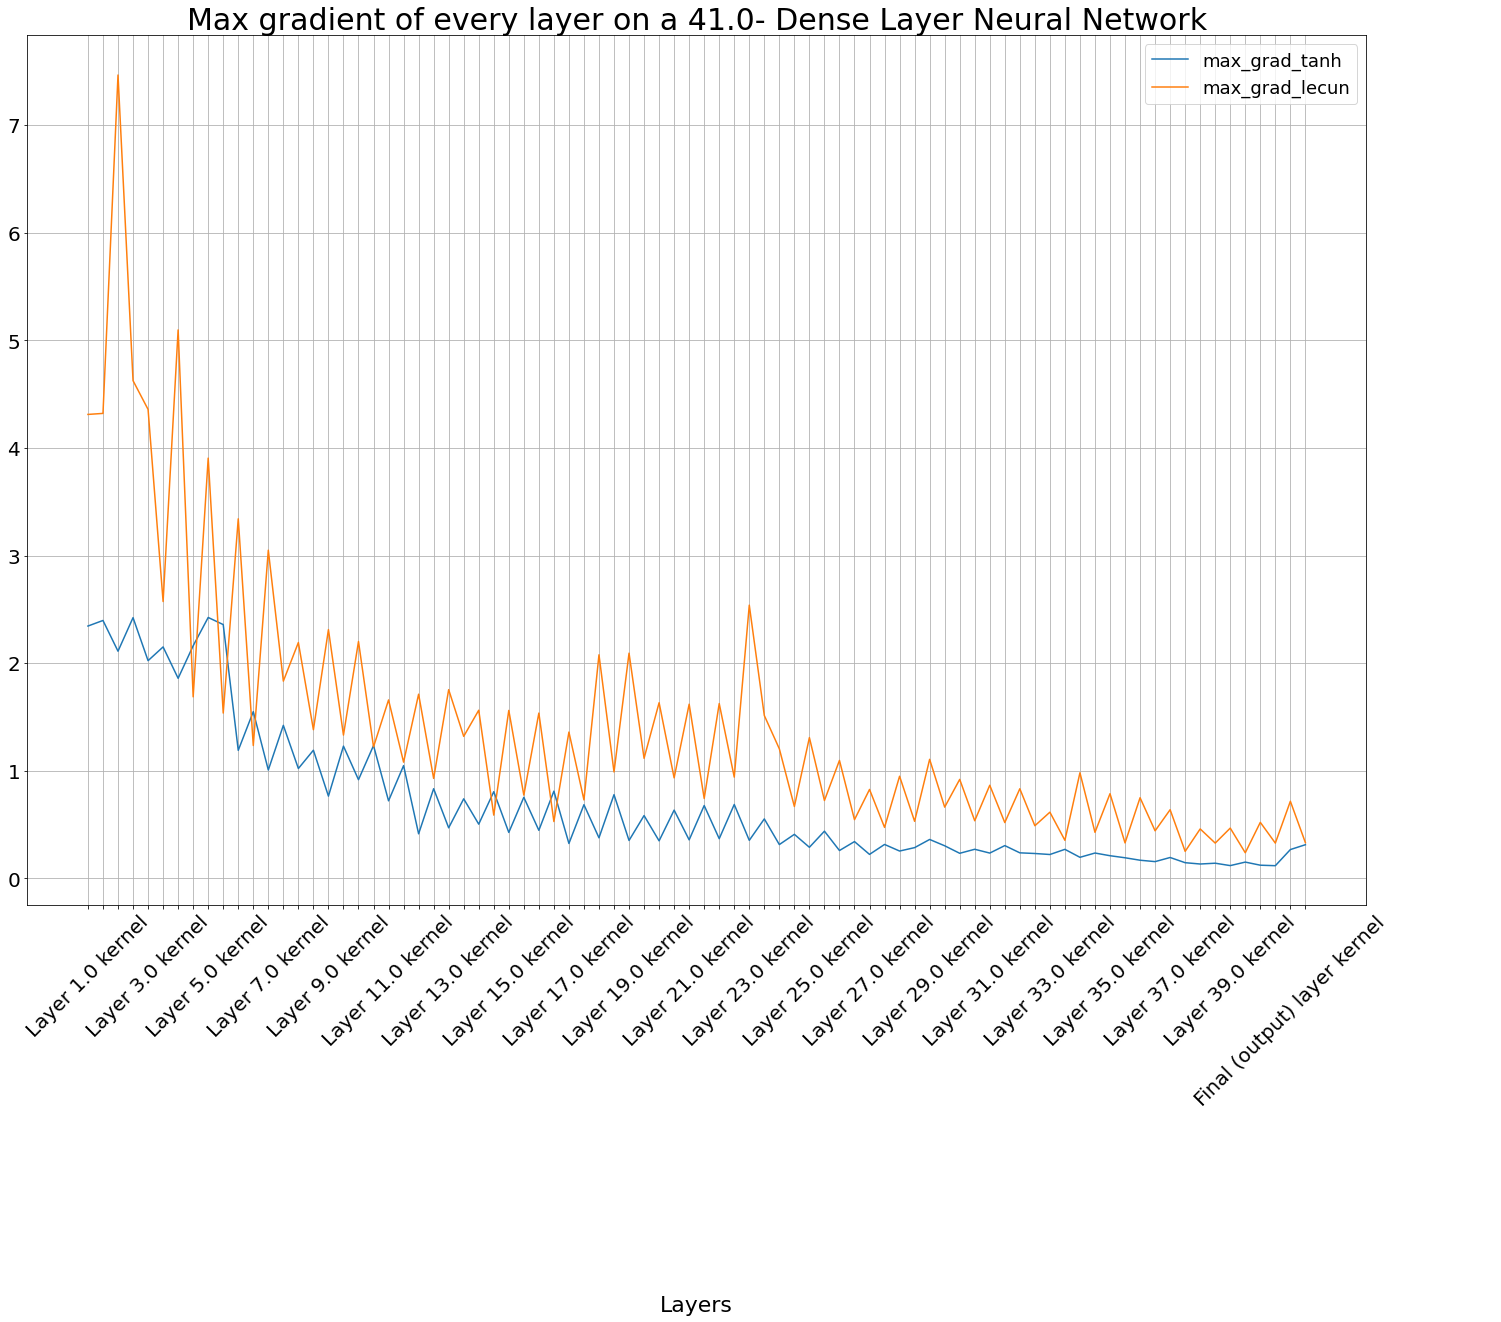

In [42]:
#And now the plotting
plot_the_max_2(tanh_max,lecun_max)